# Athens Airbnb Exploration
---

> Konstantinos Mpouros <br>
> Github: https://github.com/konstantinosmpouros <br>
> Year: 2023 <br>

## 1. About the Project
---

* This project is to fearther increase my skills in analysing and presenting data on jupyter notebook. <br>

> In this exploration of the Athens Airbnb dataset, the objective was to gain valuable insights into the patterns and characteristics of property listings in the vibrant city of Athens. The dataset, likely comprising information such as property features, pricing, location, and host details, was meticulously examined to extract meaningful information.
> The exploratory data analysis of the Athens Airbnb dataset serves as a foundational step in understanding the dynamics of the local short-term rental market. The insights gained lay the groundwork for subsequent modeling and decision-making processes in the realm of property rental and hospitality in Athens.

* You can found the datasets of this project in this [link](http://insideairbnb.com/get-the-data).

## 2. Import Libraries and Data
---

> So lets start by importing the libraries that we will use in this notebook

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
import calendar
from astropy import stats
from datetime import datetime

# Read geojson file
import geopandas as gpd

# Visualization
from matplotlib import pyplot as plt
import seaborn as sns
import folium
from wordcloud import WordCloud
from PIL import Image

# Setting the theme and the style of seaborn from the beggining in order not to need to modify it after.
sns.set_style('darkgrid')
sns.set_theme('notebook')
pd.set_option('display.max_columns', None)

> read the datasets with the airbnb lists. There are 2 data sets, one with some information and one with detailed info about the listings.

In [2]:
listings = pd.read_csv('Datasets/listings.csv')
listings.head(2)

id                                               name  host_id  \
0  10595  Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...    37177   
1  10990  Rental unit in Athens · ★4.80 · 1 bedroom · 1 ...    37177   

   host_name  neighbourhood_group neighbourhood  latitude  longitude  \
0  Emmanouil                  NaN   ΑΜΠΕΛΟΚΗΠΟΙ  37.98863   23.76527   
1  Emmanouil                  NaN   ΑΜΠΕΛΟΚΗΠΟΙ  37.98903   23.76448   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0  Entire home/apt    144               1                 42  2023-09-10   
1  Entire home/apt     70               1                 66  2023-07-01   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.28                               7               359   
1               0.49                               7                74   

   number_of_reviews_ltm      license  
0                      8  00000957568  
1                      3  00001070920

In [3]:
listings_detail = pd.read_csv('Datasets/listings_detailed.csv')
listings_detail.head(2)

id                         listing_url       scrape_id last_scraped  \
0  10595  https://www.airbnb.com/rooms/10595  20230921043851   2023-09-21   
1  10990  https://www.airbnb.com/rooms/10990  20230921043851   2023-09-21   

        source                                               name  \
0  city scrape  Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...   
1  city scrape  Rental unit in Athens · ★4.80 · 1 bedroom · 1 ...   

                                         description  \
0  The apartment is 3-bedroom apartment with 2-ba...   
1  Athens Quality Apartments - Deluxe apartment i...   

                               neighborhood_overview  \
0  Ampelokipi district is nice multinational and ...   
1  Ampelokipi district is nice multinational and ...   

                                         picture_url  host_id  \
0  https://a0.muscache.com/pictures/f7e19a44-5afe...    37177   
1  https://a0.muscache.com/pictures/8645179/c1728...    37177   

                                  host_url  host_name  host_since  \
0  https://www.airbnb.com/users/show/37177  Emmanouil  2009-09-08   
1  https://www.airbnb.com/users/show/37177  Emmanouil  2009-09-08   

    host_location                                         host_about  \
0  Athens, Greece  Athens Quality Apartments is a company started...   
1  Athens, Greece  Athens Quality Apartments is a company started...   

  host_response_time host_response_rate host_acceptance_rate  \
0     within an hour               100%                  98%   
1     within an hour               100%                  98%   

  host_is_superhost                                 host_thumbnail_url  \
0                 t  https://a0.muscache.com/im/pictures/user/859c1...   
1                 t  https://a0.muscache.com/im/pictures/user/859c1...   

                                    host_picture_url host_neighbourhood  \
0  https://a0.muscache.com/im/pictures/user/859c1...         Ambelokipi   
1  https://a0.muscache.com/im/pictures/user/859c1...         Ambelokipi   

   host_listings_count  host_total_listings_count  host_verifications  \
0                  8.0                       10.0  ['email', 'phone']   
1                  8.0                       10.0  ['email', 'phone']   

  host_has_profile_pic host_identity_verified           neighbourhood  \
0                    t                      t  Athens, Attica, Greece   
1                    t                      t  Athens, Attica, Greece   

  neighbourhood_cleansed  neighbourhood_group_cleansed  latitude  longitude  \
0            ΑΜΠΕΛΟΚΗΠΟΙ                           NaN  37.98863   23.76527   
1            ΑΜΠΕΛΟΚΗΠΟΙ                           NaN  37.98903   23.76448   

        property_type        room_type  accommodates  bathrooms  \
0        Entire condo  Entire home/apt            10        NaN   
1  Entire rental unit  Entire home/apt             4        NaN   

  bathrooms_text  bedrooms  beds  \
0        2 baths       3.0   5.0   
1         1 bath       1.0   1.0   

                                           amenities    price  minimum_nights  \
0  ["Keypad", "Hair dryer", "High chair", "Hot wa...  $144.00               1   
1  ["Hair dryer", "High chair", "Smart lock", "Ho...   $70.00               1   

   maximum_nights  minimum_minimum_nights  maximum_minimum_nights  \
0             180                       1                       5   
1            1125                       1                       2   

   minimum_maximum_nights  maximum_maximum_nights  minimum_nights_avg_ntm  \
0                     180                     180                     4.3   
1                    1125                    1125                     1.2   

   maximum_nights_avg_ntm  calendar_updated has_availability  availability_30  \
0                   180.0               NaN                t               24   
1                  1125.0               NaN                t               14   

   availability_60  availability_90  availabilit

> Import the datasets with the prices per day

In [4]:
calendar_df1= pd.read_csv('Datasets/calendar1.csv')
calendar_df1.head()

listing_id        date available    price adjusted_price  minimum_nights  \
0       10595  2023-09-21         f  $150.00         $60.00               1   
1       10595  2023-09-22         t  $150.00         $60.00               1   
2       10595  2023-09-23         t  $150.00         $75.00               1   
3       10595  2023-09-24         t  $150.00         $90.00               1   
4       10595  2023-09-25         f  $300.00        $210.00               1   

   maximum_nights  
0             180  
1             180  
2             180  
3             180  
4             180

In [5]:
calendar_df2 = pd.read_csv('Datasets/calendar2.csv')
calendar_df2.head()

listing_id        date available    price adjusted_price  minimum_nights  \
0       10595  2023-06-25         f  $200.00        $200.00             2.0   
1       10595  2023-06-26         f  $200.00        $200.00             2.0   
2       10595  2023-06-27         f  $200.00        $200.00             2.0   
3       10595  2023-06-28         f  $200.00        $200.00             2.0   
4       10595  2023-06-29         f  $200.00        $200.00             2.0   

   maximum_nights  
0           180.0  
1           180.0  
2           180.0  
3           180.0  
4           180.0

In [6]:
calendar_df3 = pd.read_csv('Datasets/calendar3.csv')
calendar_df3.head()

listing_id        date available    price adjusted_price  minimum_nights  \
0      571492  2023-03-28         t  $465.00        $465.00             3.0   
1      571492  2023-03-29         t  $465.00        $465.00             3.0   
2      571492  2023-03-30         t  $465.00        $465.00             3.0   
3      571492  2023-03-31         t  $465.00        $465.00             3.0   
4      571492  2023-04-01         t  $608.00        $608.00             3.0   

   maximum_nights  
0          1125.0  
1          1125.0  
2          1125.0  
3          1125.0  
4          1125.0

In [7]:
calendar_df4 = pd.read_csv('Datasets/calendar4.csv')
calendar_df4.head()

listing_id        date available    price adjusted_price  minimum_nights  \
0       10595  2022-12-27         f  $177.00         $71.00             1.0   
1       10595  2022-12-28         f  $177.00         $71.00             1.0   
2       10595  2022-12-29         f  $177.00         $71.00             1.0   
3       10595  2022-12-30         f  $177.00         $89.00             1.0   
4       10595  2022-12-31         f  $177.00         $89.00             1.0   

   maximum_nights  
0          1125.0  
1          1125.0  
2          1125.0  
3          1125.0  
4          1125.0

> Import the dataset with reviews per listing and reviews detailed info.

In [8]:
reviews = pd.read_csv('Datasets/reviews.csv')
reviews.head()

listing_id        date
0       10595  2011-05-20
1       10595  2012-08-15
2       10595  2013-05-20
3       10595  2014-05-04
4       10595  2014-09-13

## 3. Data cleaning
---

> Lets start by cleaning the <code>listings</code> dataset

In [9]:
listings.head(2)

id                                               name  host_id  \
0  10595  Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...    37177   
1  10990  Rental unit in Athens · ★4.80 · 1 bedroom · 1 ...    37177   

   host_name  neighbourhood_group neighbourhood  latitude  longitude  \
0  Emmanouil                  NaN   ΑΜΠΕΛΟΚΗΠΟΙ  37.98863   23.76527   
1  Emmanouil                  NaN   ΑΜΠΕΛΟΚΗΠΟΙ  37.98903   23.76448   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0  Entire home/apt    144               1                 42  2023-09-10   
1  Entire home/apt     70               1                 66  2023-07-01   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.28                               7               359   
1               0.49                               7                74   

   number_of_reviews_ltm      license  
0                      8  00000957568  
1                      3  00001070920

In [10]:
listings.shape

(12955, 18)

In [11]:
listings.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

> Drop columns that are not needed, and check about the format and nan values

In [12]:
listings.drop(columns=['neighbourhood_group', 'license', 'availability_365',
                       'reviews_per_month', 'last_review', 'minimum_nights'],
              inplace=True)

In [13]:
listings.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         6
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
number_of_reviews                 0
calculated_host_listings_count    0
number_of_reviews_ltm             0
dtype: int64

In [14]:
listings.dropna(inplace=True)
listings.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
number_of_reviews                 0
calculated_host_listings_count    0
number_of_reviews_ltm             0
dtype: int64

In [15]:
listings.shape

(12949, 12)

In [16]:
listings.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
number_of_reviews                   int64
calculated_host_listings_count      int64
number_of_reviews_ltm               int64
dtype: object

In [17]:
listings.describe()

id       host_id      latitude     longitude         price  \
count  1.294900e+04  1.294900e+04  12949.000000  12949.000000  12949.000000   
mean   3.452155e+17  2.074441e+08     37.980260     23.731755    110.288671   
std    4.025548e+17  1.680268e+08      0.013461      0.012459    738.292798   
min    1.059500e+04  1.805000e+03     37.950322     23.697700     10.000000   
25%    3.031470e+07  5.518834e+07     37.969170     23.724000     50.000000   
50%    5.096464e+07  1.748822e+08     37.978640     23.729737     71.000000   
75%    7.824635e+17  3.435154e+08     37.988400     23.737750    113.000000   
max    9.842893e+17  5.375438e+08     38.030830     23.780220  80275.000000   

       number_of_reviews  calculated_host_listings_count  \
count       12949.000000                    12949.000000   
mean           48.694648                       12.043787   
std            83.295564                       19.175571   
min             0.000000                        1.000000   
25%             2.000000                        1.000000   
50%            13.000000                        4.000000   
75%            56.000000                       14.000000   
max           865.000000                      114.000000   

       number_of_reviews_ltm  
count           12949.000000  
mean               13.741061  
std                19.795531  
min                 0.000000  
25%                 0.000000  
50%                 5.000000  
75%                19.000000  
max               206.000000

> Remove outliers

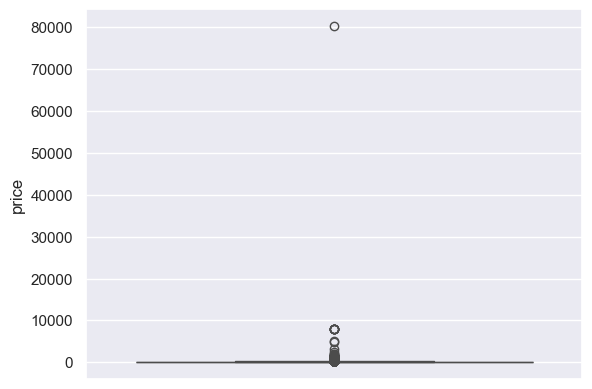

In [18]:
_= sns.boxplot(data=listings, y='price')

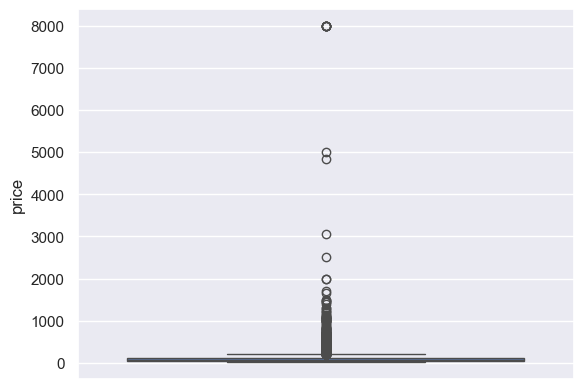

In [19]:
listings = listings.query('price < 10000')
_= sns.boxplot(data=listings, y='price')

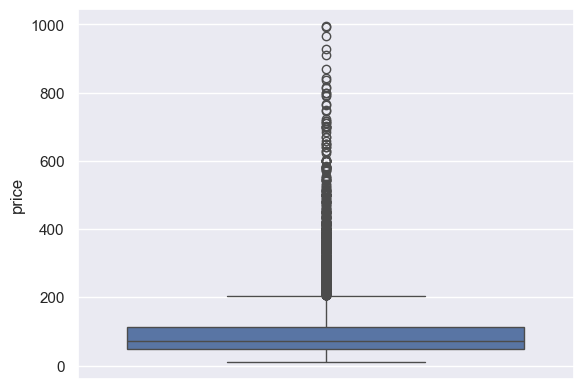

In [20]:
listings = listings.query('price < 1000')
_= sns.boxplot(data=listings, y='price')

> We have only thrown about 27 listings so that is very good

In [21]:
listings.shape

(12905, 12)

> The geografical values are well bounded

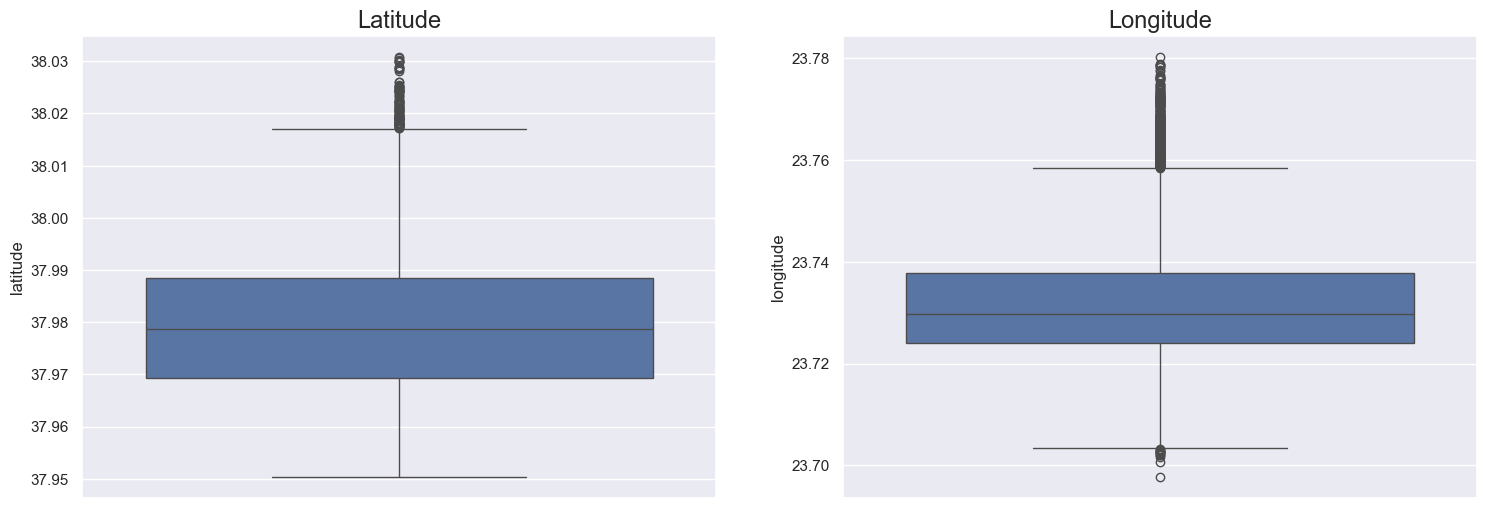

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

_= sns.boxplot(data=listings['latitude'], ax=axs[0])
axs[0].set_title('Latitude', fontsize=17)

_= sns.boxplot(data=listings['longitude'], ax=axs[1])
axs[1].set_title('Longitude', fontsize=17)

plt.show()

> As well as the rest of the variables

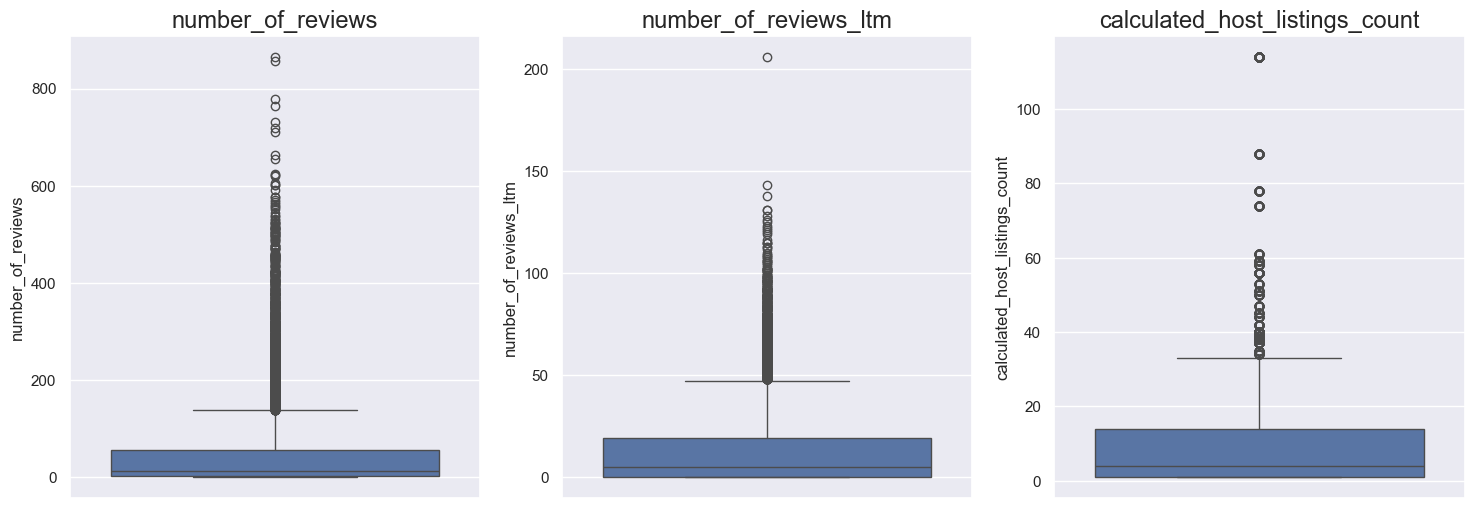

In [23]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

_= sns.boxplot(data=listings['number_of_reviews'], ax=axs[0])
axs[0].set_title('number_of_reviews', fontsize=17)

_= sns.boxplot(data=listings['number_of_reviews_ltm'], ax=axs[1])
axs[1].set_title('number_of_reviews_ltm', fontsize=17)

_= sns.boxplot(data=listings['calculated_host_listings_count'], ax=axs[2])
axs[2].set_title('calculated_host_listings_count', fontsize=17)

plt.show()

> Lets clean the <code>listings_detailed</code> dataset

In [24]:
listings_detail.head()

id                          listing_url       scrape_id last_scraped  \
0   10595   https://www.airbnb.com/rooms/10595  20230921043851   2023-09-21   
1   10990   https://www.airbnb.com/rooms/10990  20230921043851   2023-09-21   
2   10993   https://www.airbnb.com/rooms/10993  20230921043851   2023-09-21   
3   10995   https://www.airbnb.com/rooms/10995  20230921043851   2023-09-21   
4  724485  https://www.airbnb.com/rooms/724485  20230921043851   2023-09-21   

        source                                               name  \
0  city scrape  Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...   
1  city scrape  Rental unit in Athens · ★4.80 · 1 bedroom · 1 ...   
2  city scrape  Rental unit in Athens · ★4.84 · Studio · 2 bed...   
3  city scrape  Rental unit in Athens · ★4.80 · 1 bedroom · 2 ...   
4  city scrape  Rental unit in Athens · ★4.80 · 1 bedroom · 1 ...   

                                         description  \
0  The apartment is 3-bedroom apartment with 2-ba...   
1  Athens Quality Apartments - Deluxe apartment i...   
2  The Studio is an <br />-excellent located <br ...   
3  AQA No2 is 1-bedroom apartment (47m2), on the ...   
4  Value for money in an central but not "tourist...   

                               neighborhood_overview  \
0  Ampelokipi district is nice multinational and ...   
1  Ampelokipi district is nice multinational and ...   
2  Ampelokipi district is nice multinational and ...   
3  Ampelokipi district is nice multinational and ...   
4  Opposite the building is one of Athens main pa...   

                                         picture_url  host_id  \
0  https://a0.muscache.com/pictures/f7e19a44-5afe...    37177   
1  https://a0.muscache.com/pictures/8645179/c1728...    37177   
2  https://a0.muscache.com/pictures/107309527/848...    37177   
3  https://a0.muscache.com/pictures/6a565613-aaa3...    37177   
4  https://a0.muscache.com/pictures/miso/Hosting-...  3745284   

                                    host_url    host_name  host_since  \
0    https://www.airbnb.com/users/show/37177    Emmanouil  2009-09-08   
1    https://www.airbnb.com/users/show/37177    Emmanouil  2009-09-08   
2    https://www.airbnb.com/users/show/37177    Emmanouil  2009-09-08   
3    https://www.airbnb.com/users/show/37177    Emmanouil  2009-09-08   
4  https://www.airbnb.com/users/show/3745284  Elpidoforos  2012-10-03   

    host_location                                         host_about  \
0  Athens, Greece  Athens Quality Apartments is a company started...   
1  Athens, Greece  Athens Quality Apartments is a company started...   
2  Athens, Greece  Athens Quality Apartments is a company started...   
3  Athens, Greece  Athens Quality Apartments is a company started...   
4  Athens, Greece    \r\nHi , my name is Elpidoforos which can be...   

  host_response_time host_response_rate host_acceptance_rate  \
0     within an hour               100%                  98%   
1     within an hour               100%                  98%   
2     within an hour               100%                  98%   
3     within an hour               100%                  98%   
4     within an hour               100%                 100%   

  host_is_superhost                                 host_thumbnail_url  \
0                 t  https://a0.muscache.com/im/pictures/user/859c1...   
1                 t  https://a0.muscache.com/im/pictures/user/859c1...   
2                 t  https://a0.muscache.com/im/pictures/user/859c1...   
3                 t  https://a0.muscache.com/im/pictures/user/859c1...   
4               NaN  https://a0.muscache.com/im/pictures/user/2b4c0...   

                                    host_picture_url host_neighbourhood  \
0  https://a0.muscache.com/im/pictures/user/859c1...         Ambelokipi   
1  https://a0.muscache.com/im/pictures/user/859c1...         Ambelokipi   
2  https://a0.muscache.com/im/pictures/user/859c1...         Ambelokipi   
3  https://a0.muscache.com/im/pictures/user/859c1.

> Keep only the nessecary columns for our exploration

In [25]:
listings_detail = listings_detail[['id', 'name', 'description',
                                   'host_id', 'host_name',
                                   'host_is_superhost', 'host_neighbourhood',
                                   'neighbourhood_cleansed', 'latitude', 'longitude',
                                   'room_type', 'price', 'number_of_reviews', 'number_of_reviews_ltm',
                                   'review_scores_rating']]

In [26]:
listings_detail.head(2)

id                                               name  \
0  10595  Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...   
1  10990  Rental unit in Athens · ★4.80 · 1 bedroom · 1 ...   

                                         description  host_id  host_name  \
0  The apartment is 3-bedroom apartment with 2-ba...    37177  Emmanouil   
1  Athens Quality Apartments - Deluxe apartment i...    37177  Emmanouil   

  host_is_superhost host_neighbourhood neighbourhood_cleansed  latitude  \
0                 t         Ambelokipi            ΑΜΠΕΛΟΚΗΠΟΙ  37.98863   
1                 t         Ambelokipi            ΑΜΠΕΛΟΚΗΠΟΙ  37.98903   

   longitude        room_type    price  number_of_reviews  \
0   23.76527  Entire home/apt  $144.00                 42   
1   23.76448  Entire home/apt   $70.00                 66   

   number_of_reviews_ltm  review_scores_rating  
0                      8                  4.83  
1                      3                  4.80

> We can see that the 2 columns of host listings have a very high upper bound. We have keept those 2 columns in order to check the number of listings per host but we will also calculate the hardway to see if this values are appropriate

In [27]:
listings_detail.describe()

id       host_id      latitude     longitude  \
count  1.295500e+04  1.295500e+04  12955.000000  12955.000000   
mean   3.450556e+17  2.074291e+08     37.980257     23.731754   
std    4.025301e+17  1.679894e+08      0.013459      0.012458   
min    1.059500e+04  1.805000e+03     37.950322     23.697700   
25%    3.031469e+07  5.521472e+07     37.969175     23.723995   
50%    5.096457e+07  1.748825e+08     37.978630     23.729735   
75%    7.823914e+17  3.426869e+08     37.988395     23.737750   
max    9.842893e+17  5.375438e+08     38.030830     23.780220   

       number_of_reviews  number_of_reviews_ltm  review_scores_rating  
count       12955.000000           12955.000000          11002.000000  
mean           48.674489              13.735701              4.736568  
std            83.281705              19.792624              0.451237  
min             0.000000               0.000000              0.000000  
25%             2.000000               0.000000              4.680000  
50%            13.000000               5.000000              4.860000  
75%            56.000000              19.000000              4.980000  
max           865.000000             206.000000              5.000000

In [28]:
listings_detail.isna().sum()

id                           0
name                         0
description                 33
host_id                      0
host_name                    6
host_is_superhost          638
host_neighbourhood        6183
neighbourhood_cleansed       0
latitude                     0
longitude                    0
room_type                    0
price                        0
number_of_reviews            0
number_of_reviews_ltm        0
review_scores_rating      1953
dtype: int64

> The host neighbourhood is half of the values NaN. But before we remove it we should check with a groupby if we can fill the NaN. <br>
> We check if every host id have at least onece been set a neighbourhood so we can assume that this is his neighbourhood and the results is that from the 5774 host only for 2363 we have a neighbourhood.

In [29]:
listings_detail['host_id'].nunique()

5774

In [30]:
listings_detail[['host_id', 'host_neighbourhood']].groupby('host_id').agg('count').query('host_neighbourhood > 0')

host_neighbourhood
host_id                      
37177                       7
102433                      1
109363                      1
121318                      2
129245                      1
...                       ...
447681166                   1
488562112                   5
496923847                   1
515694162                   1
533449458                   1

[2363 rows x 1 columns]

In [31]:
listings_detail.drop(columns=['host_neighbourhood'], inplace=True)
listings_detail.columns

Index(['id', 'name', 'description', 'host_id', 'host_name',
       'host_is_superhost', 'neighbourhood_cleansed', 'latitude', 'longitude',
       'room_type', 'price', 'number_of_reviews', 'number_of_reviews_ltm',
       'review_scores_rating'],
      dtype='object')

In [32]:
listings_detail.isna().sum()

id                           0
name                         0
description                 33
host_id                      0
host_name                    6
host_is_superhost          638
neighbourhood_cleansed       0
latitude                     0
longitude                    0
room_type                    0
price                        0
number_of_reviews            0
number_of_reviews_ltm        0
review_scores_rating      1953
dtype: int64

> Drop also reviews score rating cause there are too many NaN.

In [33]:
listings_detail.drop(columns=['review_scores_rating'], inplace=True)
listings_detail.columns

Index(['id', 'name', 'description', 'host_id', 'host_name',
       'host_is_superhost', 'neighbourhood_cleansed', 'latitude', 'longitude',
       'room_type', 'price', 'number_of_reviews', 'number_of_reviews_ltm'],
      dtype='object')

In [34]:
listings_detail.dtypes

id                          int64
name                       object
description                object
host_id                     int64
host_name                  object
host_is_superhost          object
neighbourhood_cleansed     object
latitude                  float64
longitude                 float64
room_type                  object
price                      object
number_of_reviews           int64
number_of_reviews_ltm       int64
dtype: object

> Fix price format and bound the same as the previous dataset

In [35]:
listings_detail['price'] = listings_detail['price'].str.replace(r'[\$,]', '', regex=True)
listings_detail['price'] = listings_detail['price'].astype(float)

listings_detail['price'].head()

0    144.0
1     70.0
2     85.0
3     60.0
4     35.0
Name: price, dtype: float64

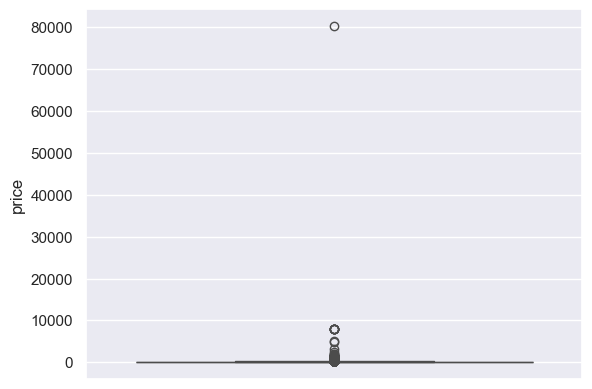

In [36]:
_= sns.boxplot(y=listings_detail['price'])

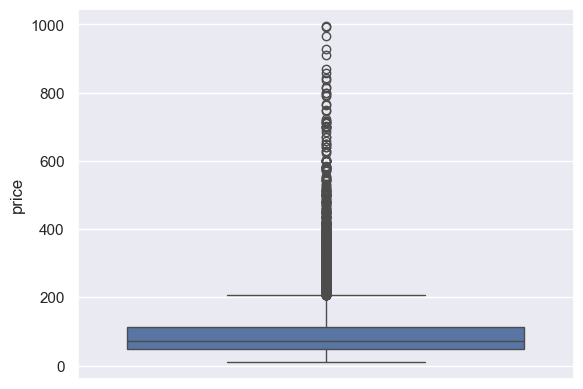

In [37]:
listings_detail = listings_detail.query('price < 1000')
_= sns.boxplot(y=listings_detail['price'])

> The geografical values are well bounded too.

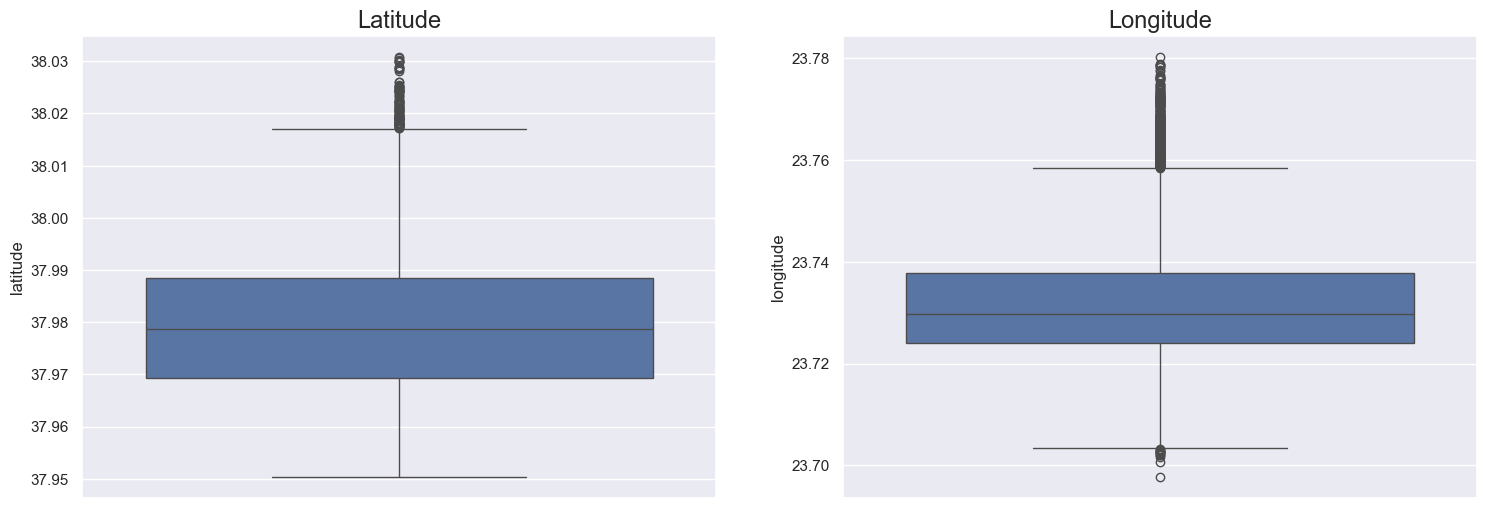

In [38]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

_= sns.boxplot(data=listings_detail['latitude'], ax=axs[0])
axs[0].set_title('Latitude', fontsize=17)

_= sns.boxplot(data=listings_detail['longitude'], ax=axs[1])
axs[1].set_title('Longitude', fontsize=17)

plt.show()

> We can also see that all the other values bounds are well except host listing count and total listing count which we are going to see

In [39]:
listings_detail.describe(include='all')

id                                               name  \
count   1.291100e+04                                              12911   
unique           NaN                                               4381   
top              NaN  Rental unit in Athina · 1 bedroom · 1 bed · 1 ...   
freq             NaN                                                491   
mean    3.452505e+17                                                NaN   
std     4.024965e+17                                                NaN   
min     1.059500e+04                                                NaN   
25%     3.031469e+07                                                NaN   
50%     5.096457e+07                                                NaN   
75%     7.823914e+17                                                NaN   
max     9.842893e+17                                                NaN   

                                              description       host_id  \
count                                               12878  1.291100e+04   
unique                                              12320           NaN   
top     Wukela Apartments 地处雅典市中心，有着开阔的视野和良好的环境位置，站在你所...           NaN   
freq                                                   19           NaN   
mean                                                  NaN  2.072766e+08   
std                                                   NaN  1.680922e+08   
min                                                   NaN  1.805000e+03   
25%                                                   NaN  5.515385e+07   
50%                                                   NaN  1.745922e+08   
75%                                                   NaN  3.426869e+08   
max                                                   NaN  5.375438e+08   

       host_name host_is_superhost  neighbourhood_cleansed      latitude  \
count      12905             12274                   12911  12911.000000   
unique      2515                 2                      44           NaN   
top       George                 f  ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ           NaN   
freq         248              7496                    2404           NaN   
mean         NaN               NaN                     NaN     37.980271   
std          NaN               NaN                     NaN      0.013464   
min          NaN               NaN                     NaN     37.950322   
25%          NaN               NaN                     NaN     37.969218   
50%          NaN               NaN                     NaN     37.978642   
75%          NaN               NaN                     NaN     37.988410   
max          NaN               NaN                     NaN     38.030830   

           longitude        room_type         price  number_of_reviews  \
count   12911.000000            12911  12911.000000       12911.000000   
unique           NaN                4           NaN                NaN   
top              NaN  Entire home/apt           NaN                NaN   
freq             NaN            11615           NaN                NaN   
mean       23.731763              NaN     95.950817          48.774456   
std         0.012469              NaN     82.715927          83.382366   
min        23.697700              NaN     10.000000           0.000000   
25%        23.723980              NaN     50.000000           2.000000   
50%        23.729730              NaN     71.000000          13.000000   
75%        23.737770              NaN    112.500000          56.000000   
max        23.780220              NaN    995.000000         865.000000   

        number_of_reviews_ltm  
count            12911.000000  
unique                    NaN  
top                       NaN  
freq                      NaN  
mean                13.767872  
std                 19.804672  
min                  0.000000  
25%                  0.000000  
50%                  5.000000  
75%                 19.000000  
max                206.000000

> Lets clean the <code>calendar_df1</code> now.

In [40]:
calendar_df1.head()

listing_id        date available    price adjusted_price  minimum_nights  \
0       10595  2023-09-21         f  $150.00         $60.00               1   
1       10595  2023-09-22         t  $150.00         $60.00               1   
2       10595  2023-09-23         t  $150.00         $75.00               1   
3       10595  2023-09-24         t  $150.00         $90.00               1   
4       10595  2023-09-25         f  $300.00        $210.00               1   

   maximum_nights  
0             180  
1             180  
2             180  
3             180  
4             180

> fix the prices format

In [41]:
calendar_df1['price'] = calendar_df1['price'].str.replace(r'[\$,]', '', regex=True)
calendar_df1['adjusted_price'] = calendar_df1['adjusted_price'].str.replace(r'[\$,]', '', regex=True)

calendar_df1['price'] = calendar_df1['price'].astype(float)
calendar_df1['adjusted_price'] = calendar_df1['adjusted_price'].astype(float)

calendar_df1.head()

listing_id        date available  price  adjusted_price  minimum_nights  \
0       10595  2023-09-21         f  150.0            60.0               1   
1       10595  2023-09-22         t  150.0            60.0               1   
2       10595  2023-09-23         t  150.0            75.0               1   
3       10595  2023-09-24         t  150.0            90.0               1   
4       10595  2023-09-25         f  300.0           210.0               1   

   maximum_nights  
0             180  
1             180  
2             180  
3             180  
4             180

> Max and min night wont be needed so lets drop them

In [42]:
calendar_df1.drop(columns=['minimum_nights', 'maximum_nights'], inplace=True)

In [43]:
calendar_df1.columns

Index(['listing_id', 'date', 'available', 'price', 'adjusted_price'], dtype='object')

> The prices here will be bounded as well to 1000

In [44]:
round(calendar_df1.describe(include='all'), 2)

listing_id        date available       price  adjusted_price
count   4.728229e+06     4728229   4728229  4728229.00      4728229.00
unique           NaN         365         2         NaN             NaN
top              NaN  2024-09-19         t         NaN             NaN
freq             NaN       12955   2952068         NaN             NaN
mean    3.450809e+17         NaN       NaN      141.85          138.43
std     4.025185e+17         NaN       NaN      799.49          744.83
min     1.059500e+04         NaN       NaN        0.00            0.00
25%     3.031469e+07         NaN       NaN       50.00           50.00
50%     5.096457e+07         NaN       NaN       71.00           71.00
75%     7.824274e+17         NaN       NaN      117.00          115.00
max     9.842893e+17         NaN       NaN    85140.00        85140.00

In [45]:
calendar_df1.shape

(4728229, 5)

In [46]:
calendar_df1= calendar_df1.query('price < 1000 and adjusted_price < 1000')
calendar_df1.head()

listing_id        date available  price  adjusted_price
0       10595  2023-09-21         f  150.0            60.0
1       10595  2023-09-22         t  150.0            60.0
2       10595  2023-09-23         t  150.0            75.0
3       10595  2023-09-24         t  150.0            90.0
4       10595  2023-09-25         f  300.0           210.0

> We dont have NaN values and format fix in date varible and extract the year month and day.

In [47]:
calendar_df1.isna().sum()

listing_id        0
date              0
available         0
price             0
adjusted_price    0
dtype: int64

In [48]:
calendar_df1.dtypes

listing_id          int64
date               object
available          object
price             float64
adjusted_price    float64
dtype: object

In [49]:
calendar_df1['date'] = pd.to_datetime(calendar_df1['date'])

In [50]:
calendar_df1.dtypes

listing_id                 int64
date              datetime64[ns]
available                 object
price                    float64
adjusted_price           float64
dtype: object

> The same work we have done in <code>calendar_df1</code> we will do to the other three dataset we have about infromation per day

In [51]:
calendar_df2.drop(columns=['minimum_nights', 'maximum_nights'], inplace=True)
calendar_df3.drop(columns=['minimum_nights', 'maximum_nights'], inplace=True)
calendar_df4.drop(columns=['minimum_nights', 'maximum_nights'], inplace=True)

# Format fix in price and adjusted price and date in calendar_df2
calendar_df2['price'] = calendar_df2['price'].str.replace(r'[\$,]', '', regex=True)
calendar_df2['adjusted_price'] = calendar_df2['adjusted_price'].str.replace(r'[\$,]', '', regex=True)
calendar_df2['price'] = calendar_df2['price'].astype(float)
calendar_df2['adjusted_price'] = calendar_df2['adjusted_price'].astype(float)
calendar_df2['date'] = pd.to_datetime(calendar_df2['date'])

# Format fix in price and adjusted price and date in calendar_df3
calendar_df3['price'] = calendar_df3['price'].str.replace(r'[\$,]', '', regex=True)
calendar_df3['adjusted_price'] = calendar_df3['adjusted_price'].str.replace(r'[\$,]', '', regex=True)
calendar_df3['price'] = calendar_df3['price'].astype(float)
calendar_df3['adjusted_price'] = calendar_df3['adjusted_price'].astype(float)
calendar_df3['date'] = pd.to_datetime(calendar_df3['date'])

# Format fix in price and adjusted price and date in calendar_df4
calendar_df4['price'] = calendar_df4['price'].str.replace(r'[\$,]', '', regex=True)
calendar_df4['adjusted_price'] = calendar_df4['adjusted_price'].str.replace(r'[\$,]', '', regex=True)
calendar_df4['price'] = calendar_df4['price'].astype(float)
calendar_df4['adjusted_price'] = calendar_df4['adjusted_price'].astype(float)
calendar_df4['date'] = pd.to_datetime(calendar_df4['date'])

> Now lets check the <code>reviews</code> dataframe. Which appears to be very clean.

In [52]:
reviews.head()

listing_id        date
0       10595  2011-05-20
1       10595  2012-08-15
2       10595  2013-05-20
3       10595  2014-05-04
4       10595  2014-09-13

In [53]:
reviews.shape

(630578, 2)

> Fix date format

In [54]:
reviews.dtypes

listing_id     int64
date          object
dtype: object

In [55]:
reviews['date'] = pd.to_datetime(reviews['date'])

In [56]:
reviews['year'] = reviews['date'].dt.year
reviews['month'] = reviews['date'].dt.month
reviews['day'] = reviews['date'].dt.day

reviews.head()

listing_id       date  year  month  day
0       10595 2011-05-20  2011      5   20
1       10595 2012-08-15  2012      8   15
2       10595 2013-05-20  2013      5   20
3       10595 2014-05-04  2014      5    4
4       10595 2014-09-13  2014      9   13

In [57]:
reviews.isna().sum()

listing_id    0
date          0
year          0
month         0
day           0
dtype: int64

In [58]:
reviews.describe(include='all')

listing_id                           date           year  \
count  6.305780e+05                         630578  630578.000000   
mean   7.967347e+16  2021-01-14 17:00:15.562864640    2020.513426   
min    1.059500e+04            2010-07-08 00:00:00    2010.000000   
25%    1.789947e+07            2019-05-30 00:00:00    2019.000000   
50%    2.751510e+07            2021-09-15 00:00:00    2021.000000   
75%    4.160287e+07            2022-10-27 00:00:00    2022.000000   
max    9.795963e+17            2023-09-21 00:00:00    2023.000000   
std    2.277123e+17                            NaN       2.202772   

               month            day  
count  630578.000000  630578.000000  
mean        6.849552      15.687690  
min         1.000000       1.000000  
25%         5.000000       8.000000  
50%         7.000000      16.000000  
75%         9.000000      23.000000  
max        12.000000      31.000000  
std         2.843086       8.849833

In [59]:
reviews.nunique()

listing_id    10999
date           4025
year             14
month            12
day              31
dtype: int64

## 4. Exploratory Data Analysis (EDA)
---

### Spatial Clustering Analysis

>Lets visualize the longitude and latitude and transform them from the sphere that was taken to a 2D flat projection <br>

In [60]:
def lng_lat_to_pixels(lng, lat):    
    lng_rad = lng * np.pi / 180
    lat_rad = lat * np.pi / 180
    x = (256/(2*np.pi))*(lng_rad + np.pi)
    y = (256/(2*np.pi))*(np.log(np.tan(np.pi/4 + lat_rad/2)))
    return (x, y)

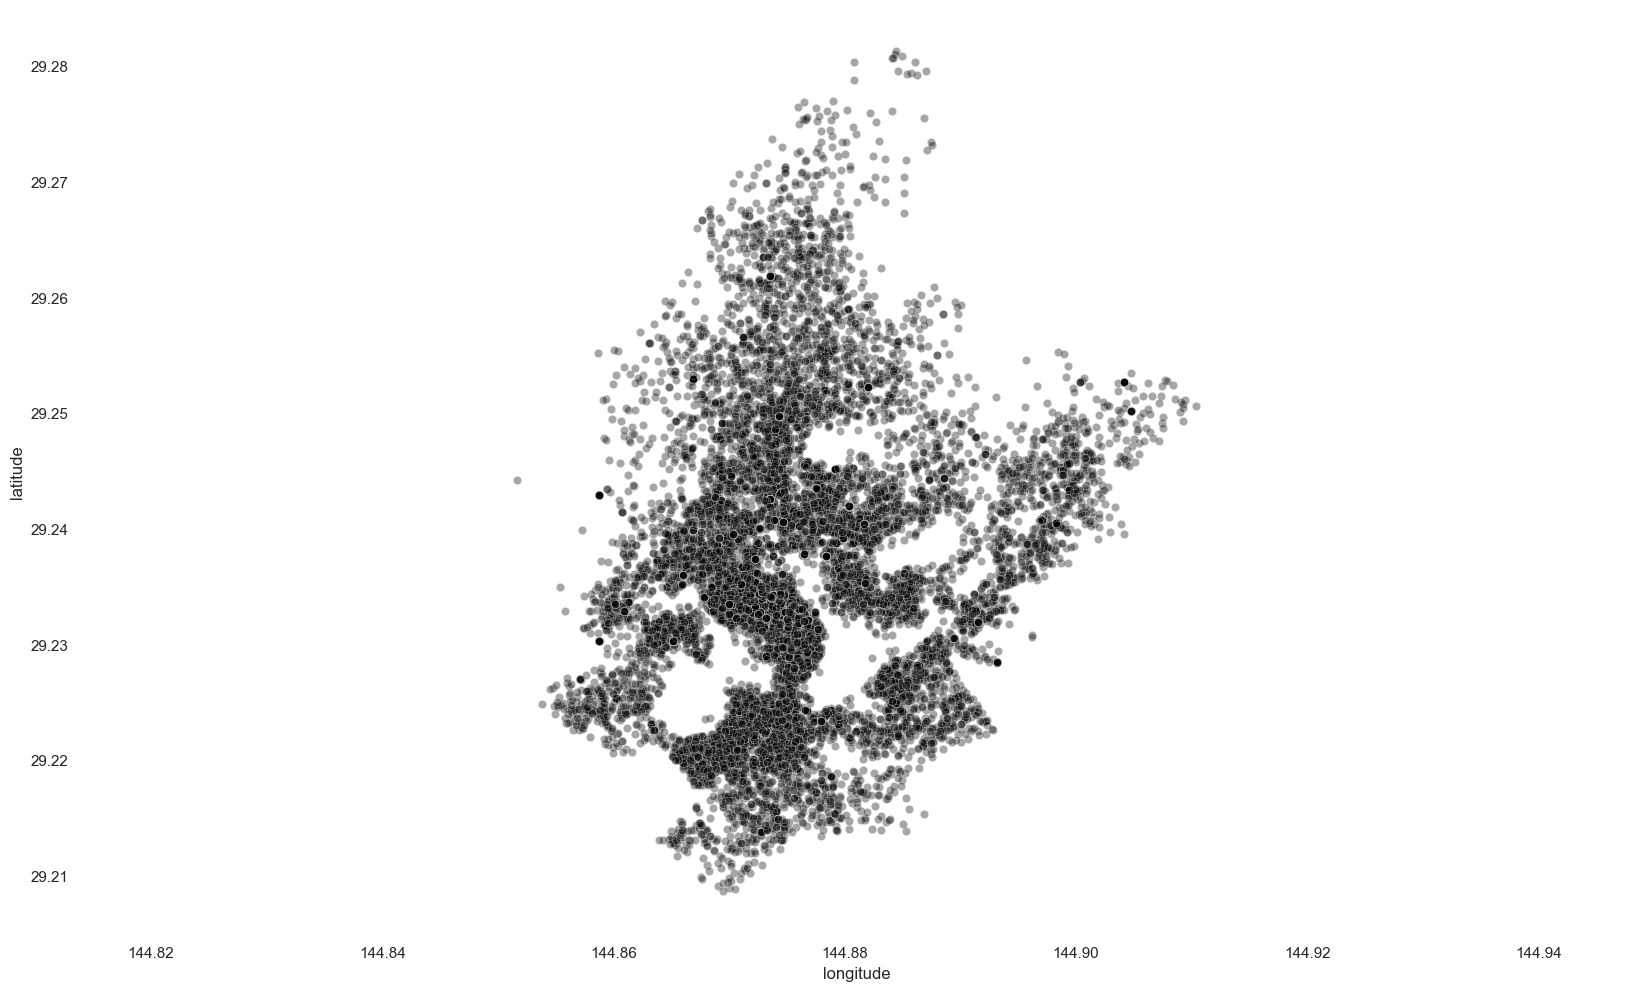

In [61]:
px, py = lng_lat_to_pixels(listings['longitude'], listings['latitude'])

plt.figure(figsize=(20, 12))
sns.set_theme(style="whitegrid")

_= sns.scatterplot(x=px, y=py, color='black', alpha=.35)

plt.axis('equal')
plt.grid(False)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.savefig('Graphs/maping.png')
plt.show()

### Most famous neighbourhood per listings number.

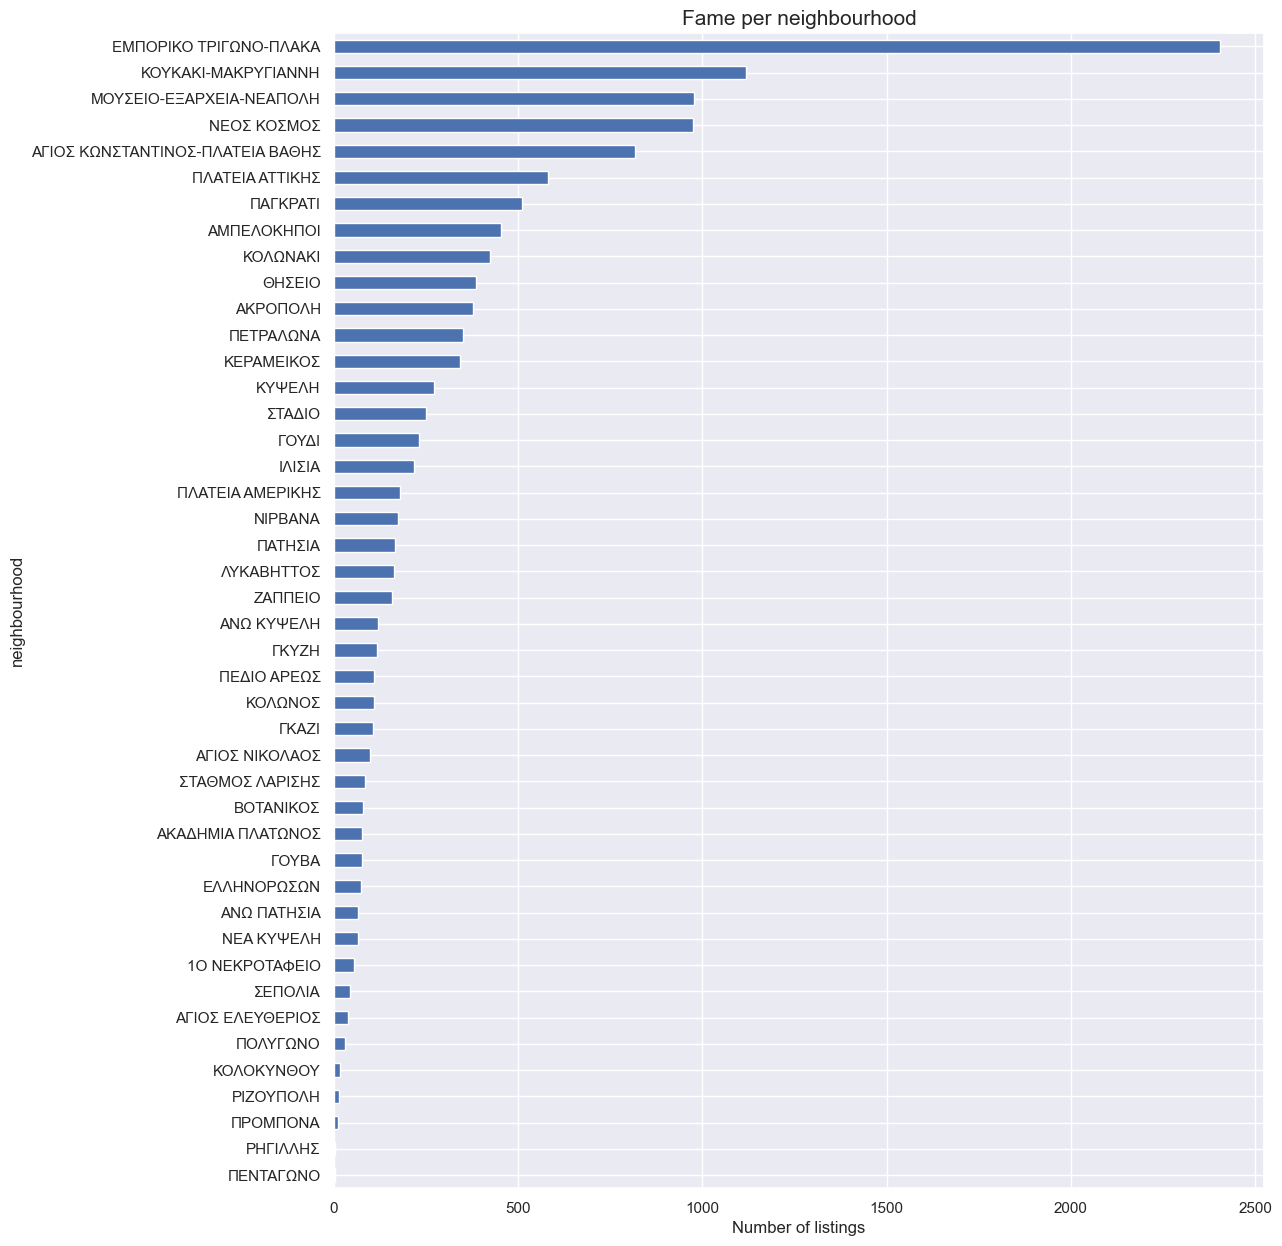

In [62]:
sns.set_style('darkgrid')

listings['neighbourhood'].value_counts().sort_values(ascending=True).plot(kind='barh', figsize=(12, 15))

plt.xlabel('Number of listings')
plt.title('Fame per neighbourhood', fontsize=15)

plt.savefig('Graphs/neighbourhood_listings.png')
plt.show()

### Property Type Distribution

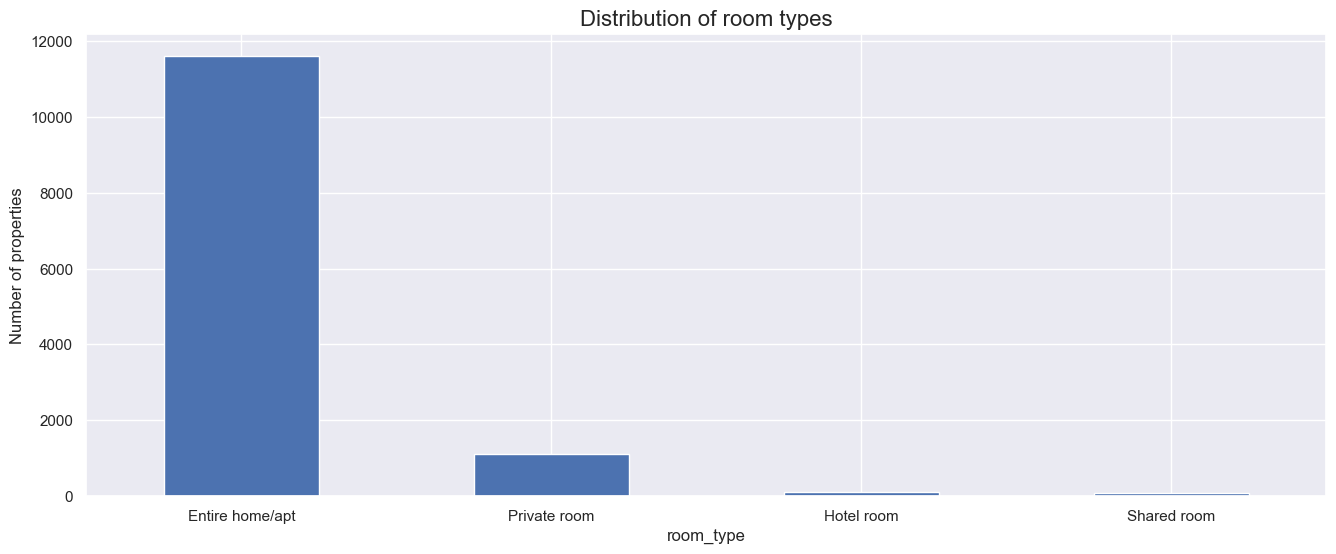

In [63]:
listings['room_type'].value_counts().plot(kind='bar', figsize=(16, 6))

plt.xticks(rotation=0)
plt.ylabel('Number of properties')
plt.title('Distribution of room types', fontsize=16)

plt.savefig('Graphs/property_type_distrib.png')
plt.show()

### Pricing frequency

* Lets visualize the pricing distribution with 3 different algorithms.

> The Freedman-Diaconis rule

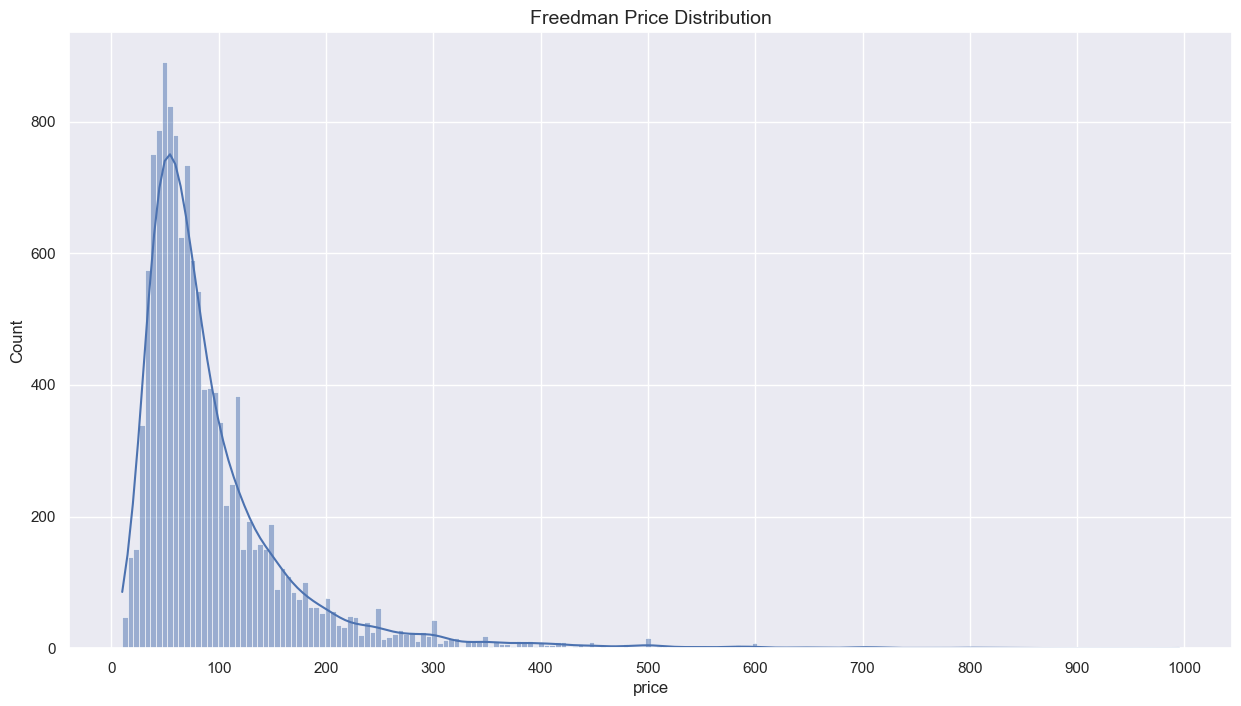

In [64]:
plt.figure(figsize=(15,8))

num_bins = len(stats.freedman_bin_width(listings['price'], return_bins=True)[1])

_= sns.histplot(data=listings['price'],
                bins=num_bins,
                kde=True)

plt.xticks(range(0, int(listings['price'].max()) + 100, 100))
plt.title('Freedman Price Distribution', fontsize=14)

plt.savefig('Graphs/price_distrib_Freedman.png')

> The Scott’s rule

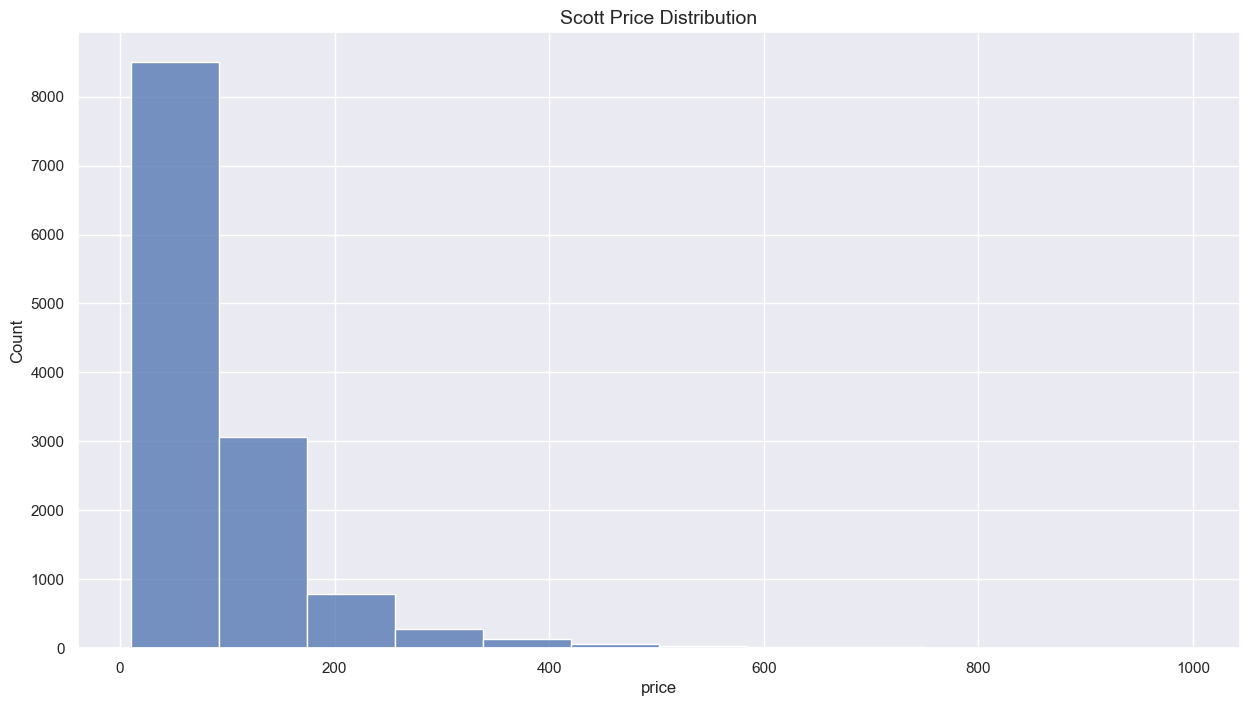

In [65]:
plt.figure(figsize=(15,8))

num_bins = int(stats.scott_bin_width(listings['price']))

_= sns.histplot(data=listings['price'], bins=num_bins)
plt.title('Scott Price Distribution', fontsize=14)

plt.savefig('Graphs/price_distrib_Scott.png')

> The Knuth’s rule

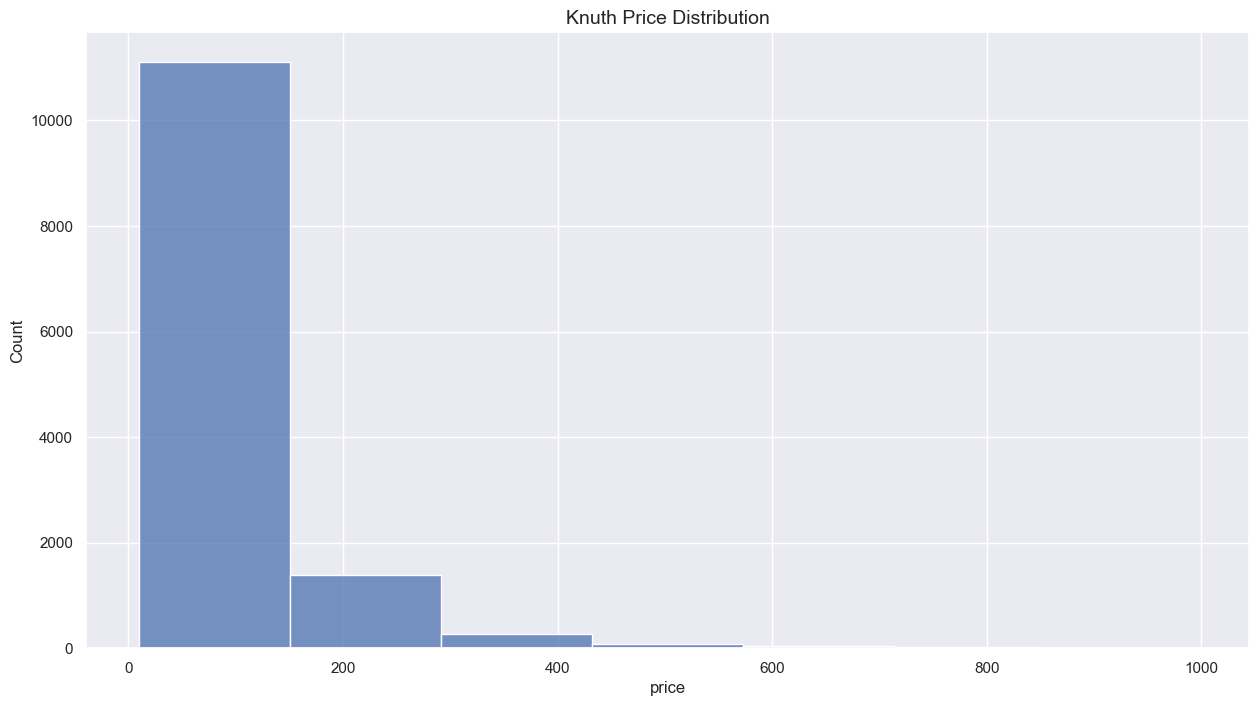

In [66]:
plt.figure(figsize=(15,8))

num_bins = int(stats.knuth_bin_width(listings['price']))

_= sns.histplot(data=listings['price'], bins=num_bins)
plt.title('Knuth Price Distribution', fontsize=14)

plt.savefig('Graphs/price_distrib_Knuth.png')

### Availability Overview

> First lets see the availability from the first calendar dataset we have wich contains data from 21/9/2023 and after

In [67]:
availability = calendar_df1[calendar_df1['available'] == 't'] \
                                        .groupby('date') \
                                        .agg(available_lists=('listing_id', 'count'))
availability.head()

available_lists
date                       
2023-09-21              534
2023-09-22              975
2023-09-23             1466
2023-09-24             2484
2023-09-25             3183

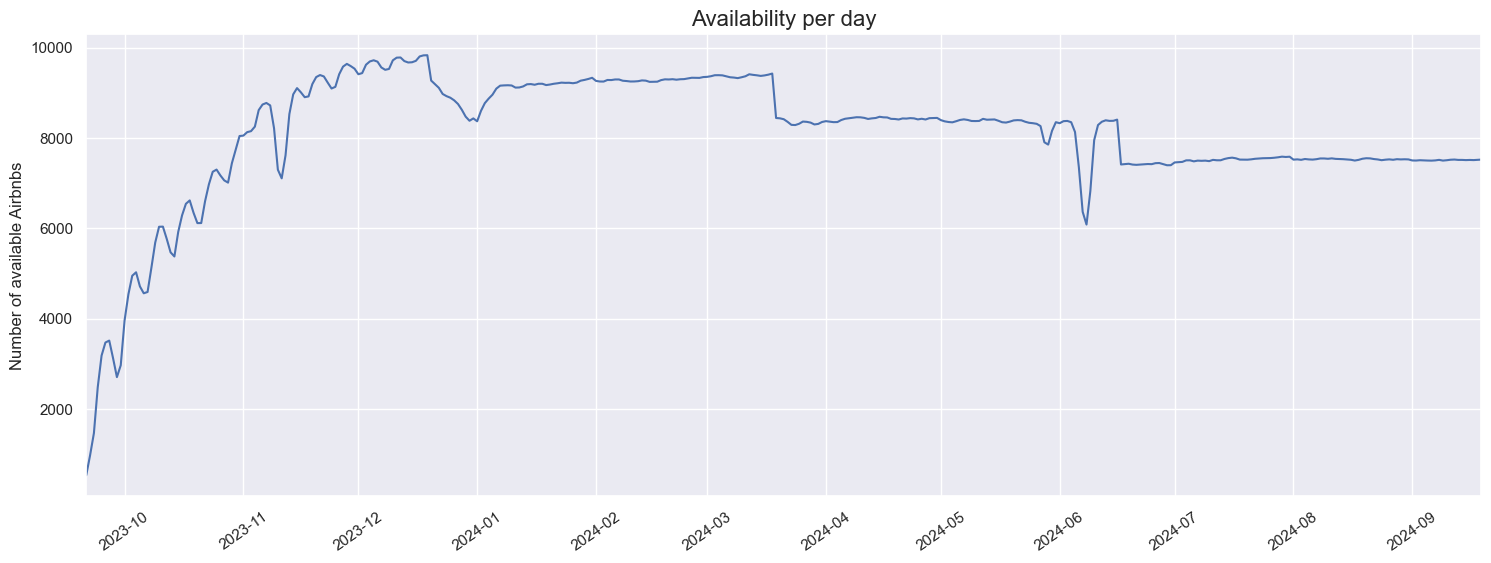

In [68]:
plt.figure(figsize=(18,6))

_= sns.lineplot(data=availability)

plt.title('Availability per day', fontsize=16)
plt.xlabel(None)
plt.ylabel('Number of available Airbnbs')

plt.xticks(rotation=35)
plt.xlim(availability.index.min(), availability.index.max())

plt.legend().set_visible(False)

plt.savefig('Graphs/availability.png')
plt.show()

> We can see the the availability have ups and down in a period of four month cause after no much reservations have been done.
> By the way l found 3 more data set from inside Airbnb that was archived and are previous scrapes that have been done. We will take the period that is between every scrape and make the diagram again.

> We create a dataframe with all the data from the 4 calendar dataset.

In [69]:
calendar_df = [
   calendar_df1.query('date >= "2023-09-21" and date <= "2023-12-27" and price <= 1000 and adjusted_price <= 1000'),
   calendar_df2.query('date >= "2023-06-25" and date <= "2023-09-20" and price <= 1000 and adjusted_price <= 1000'),
   calendar_df3.query('date >= "2023-03-27" and date <= "2023-06-25" and price <= 1000 and adjusted_price <= 1000'),
   calendar_df4.query('date >= "2022-12-27" and date <= "2023-03-27" and price <= 1000 and adjusted_price <= 1000')
]
calendar_df = pd.concat(calendar_df, ignore_index=True)
calendar_df

listing_id       date available  price  adjusted_price
0             10595 2023-09-21         f  150.0            60.0
1             10595 2023-09-22         t  150.0            60.0
2             10595 2023-09-23         t  150.0            75.0
3             10595 2023-09-24         t  150.0            90.0
4             10595 2023-09-25         f  300.0           210.0
...             ...        ...       ...    ...             ...
4359361      502779 2023-03-23         f  387.0           387.0
4359362      502779 2023-03-24         f  387.0           387.0
4359363      502779 2023-03-25         f  387.0           387.0
4359364      502779 2023-03-26         f  387.0           387.0
4359365      502779 2023-03-27         f  387.0           387.0

[4359366 rows x 5 columns]

In [70]:
calendar_df2.head()

listing_id       date available  price  adjusted_price
0       10595 2023-06-25         f  200.0           200.0
1       10595 2023-06-26         f  200.0           200.0
2       10595 2023-06-27         f  200.0           200.0
3       10595 2023-06-28         f  200.0           200.0
4       10595 2023-06-29         f  200.0           200.0

In [71]:
calendar_df3.head()

listing_id       date available  price  adjusted_price
0      571492 2023-03-28         t  465.0           465.0
1      571492 2023-03-29         t  465.0           465.0
2      571492 2023-03-30         t  465.0           465.0
3      571492 2023-03-31         t  465.0           465.0
4      571492 2023-04-01         t  608.0           608.0

In [72]:
calendar_df4.head()

listing_id       date available  price  adjusted_price
0       10595 2022-12-27         f  177.0            71.0
1       10595 2022-12-28         f  177.0            71.0
2       10595 2022-12-29         f  177.0            71.0
3       10595 2022-12-30         f  177.0            89.0
4       10595 2022-12-31         f  177.0            89.0

> Extract the available listings and groupby date in order to take the daily availability to plot the results

In [73]:
available_calendar = calendar_df.query('available == "t"')
available_calendar

listing_id       date available  price  adjusted_price
1             10595 2023-09-22         t  150.0            60.0
2             10595 2023-09-23         t  150.0            75.0
3             10595 2023-09-24         t  150.0            90.0
9             10595 2023-09-30         t  150.0           150.0
10            10595 2023-10-01         t  150.0           150.0
...             ...        ...       ...    ...             ...
4359346      502779 2023-03-08         t  387.0           387.0
4359347      502779 2023-03-09         t  387.0           387.0
4359351      502779 2023-03-13         t  387.0           387.0
4359352      502779 2023-03-14         t  387.0           387.0
4359353      502779 2023-03-15         t  387.0           387.0

[2389843 rows x 5 columns]

In [74]:
available_calendar = available_calendar.groupby('date') \
                                .agg(
                                    avalabile_listings=('listing_id', 'count'),
                                    avg_price=('price', 'mean'),
                                    avg_adj_price=('adjusted_price', 'mean')
                                    )
available_calendar

avalabile_listings   avg_price  avg_adj_price
date                                                     
2022-12-27                 698   82.083095      80.424069
2022-12-28                2409   91.598174      89.012868
2022-12-29                2923   88.075607      85.827574
2022-12-30                3156   90.769645      88.540875
2022-12-31                3123   90.297150      88.269933
...                        ...         ...            ...
2023-12-23                8975  102.370585     100.706852
2023-12-24                8927  102.851798     101.213622
2023-12-25                8892  102.833671     101.214013
2023-12-26                8834  102.516980     100.920647
2023-12-27                8753  102.401577     100.801554

[366 rows x 3 columns]

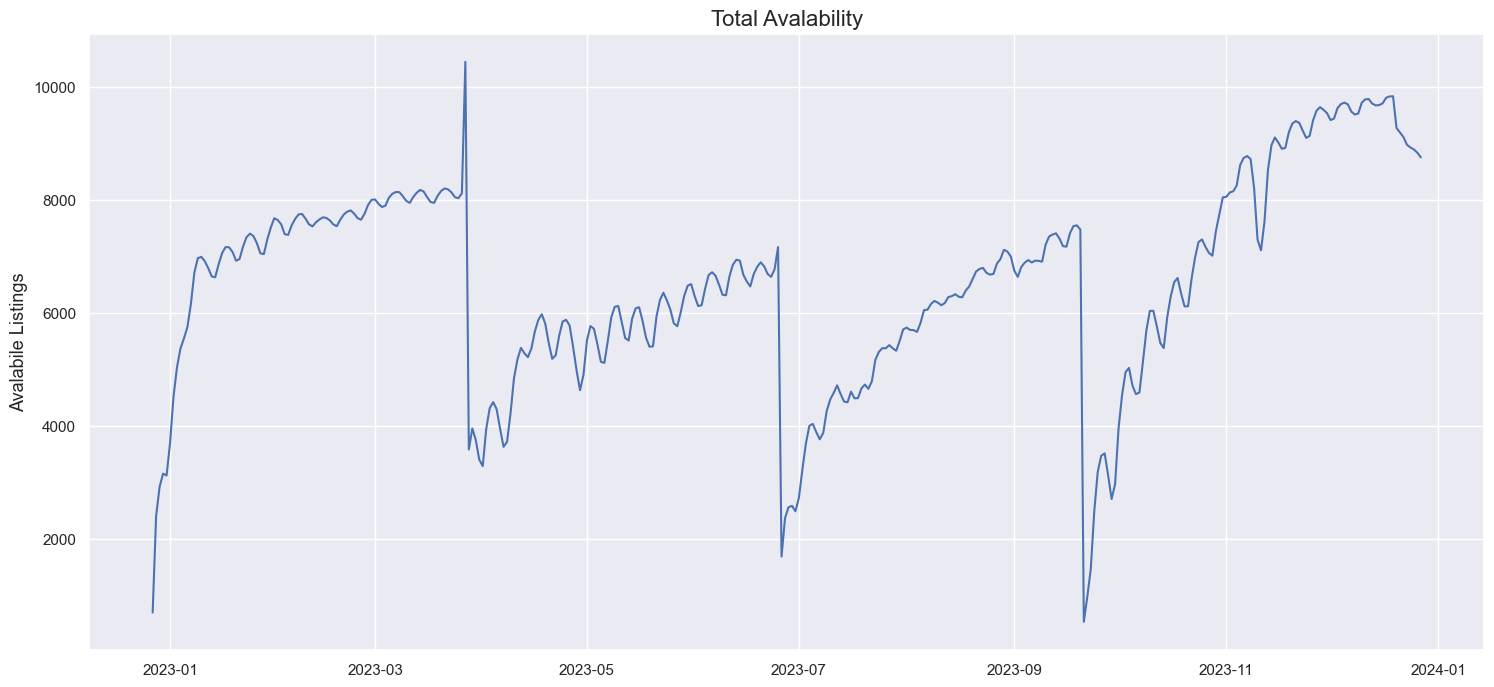

In [75]:
plt.figure(figsize=(18, 8))

_= sns.lineplot(data=available_calendar['avalabile_listings'])

plt.xlabel(None)
plt.ylabel('Avalabile Listings', fontsize=13)
plt.title('Total Avalability', fontsize=16)

plt.savefig('Graphs/total_availability.png')
plt.show()

### Occupation Overview

> Lets check about the number of occupated nights we had in each month.

In [76]:
calendar_df.dtypes

listing_id                 int64
date              datetime64[ns]
available                 object
price                    float64
adjusted_price           float64
dtype: object

In [77]:
calendar_df['year'] = calendar_df['date'].dt.year
calendar_df['month'] = calendar_df['date'].dt.month
calendar_df['day'] = calendar_df['date'].dt.day

> Extract the days that the listings were not available so they were occupied

In [78]:
occupation_calendar = calendar_df.query('available == "f"')
occupation_calendar

listing_id       date available  price  adjusted_price  year  month  \
0             10595 2023-09-21         f  150.0            60.0  2023      9   
4             10595 2023-09-25         f  300.0           210.0  2023      9   
5             10595 2023-09-26         f  300.0           240.0  2023      9   
6             10595 2023-09-27         f  300.0           270.0  2023      9   
7             10595 2023-09-28         f  300.0           300.0  2023      9   
...             ...        ...       ...    ...             ...   ...    ...   
4359361      502779 2023-03-23         f  387.0           387.0  2023      3   
4359362      502779 2023-03-24         f  387.0           387.0  2023      3   
4359363      502779 2023-03-25         f  387.0           387.0  2023      3   
4359364      502779 2023-03-26         f  387.0           387.0  2023      3   
4359365      502779 2023-03-27         f  387.0           387.0  2023      3   

         day  
0         21  
4         25  
5         26  
6         27  
7         28  
...      ...  
4359361   23  
4359362   24  
4359363   25  
4359364   26  
4359365   27  

[1969523 rows x 8 columns]

In [79]:
occupation_calendar.nunique()

listing_id        14857
date                366
available             1
price               896
adjusted_price      889
year                  2
month                12
day                  31
dtype: int64

> Extract all the number of listings that we have data in each month in order to find the percentage of occupations

In [80]:
all_listings_per_month = calendar_df.groupby('month').agg(num_listings=('listing_id', 'nunique'))['num_listings']
all_listings_per_month

month
1     11001
2     11003
3     12132
4     11342
5     11341
6     13084
7     12308
8     12311
9     13633
10    12926
11    12917
12    14713
Name: num_listings, dtype: int64

In [81]:
occ_per_month = occupation_calendar \
                    .groupby('month') \
                    .agg(
                        occupation=('listing_id', 'count'),
                        perc_occupation=('listing_id', 'nunique')
                    )
occ_per_month['perc_occupation'] = occ_per_month['perc_occupation'] / all_listings_per_month
occ_per_month

occupation  perc_occupation
month                             
1          134606         0.766385
2           93374         0.456239
3          114869         0.854764
4          190754         0.859901
5          170103         0.752403
6          170441         0.938780
7          239665         0.915502
8          183567         0.769637
9          208064         0.958850
10         211905         0.860436
11         123765         0.571185
12         128410         0.753755

> Transform the month number to month name and visualize the occupations per month

In [82]:
occ_per_month.reset_index(inplace=True)

occ_per_month['month'] = [calendar.month_name[i] for i in occ_per_month['month']]
occ_per_month

month  occupation  perc_occupation
0     January      134606         0.766385
1    February       93374         0.456239
2       March      114869         0.854764
3       April      190754         0.859901
4         May      170103         0.752403
5        June      170441         0.938780
6        July      239665         0.915502
7      August      183567         0.769637
8   September      208064         0.958850
9     October      211905         0.860436
10   November      123765         0.571185
11   December      128410         0.753755

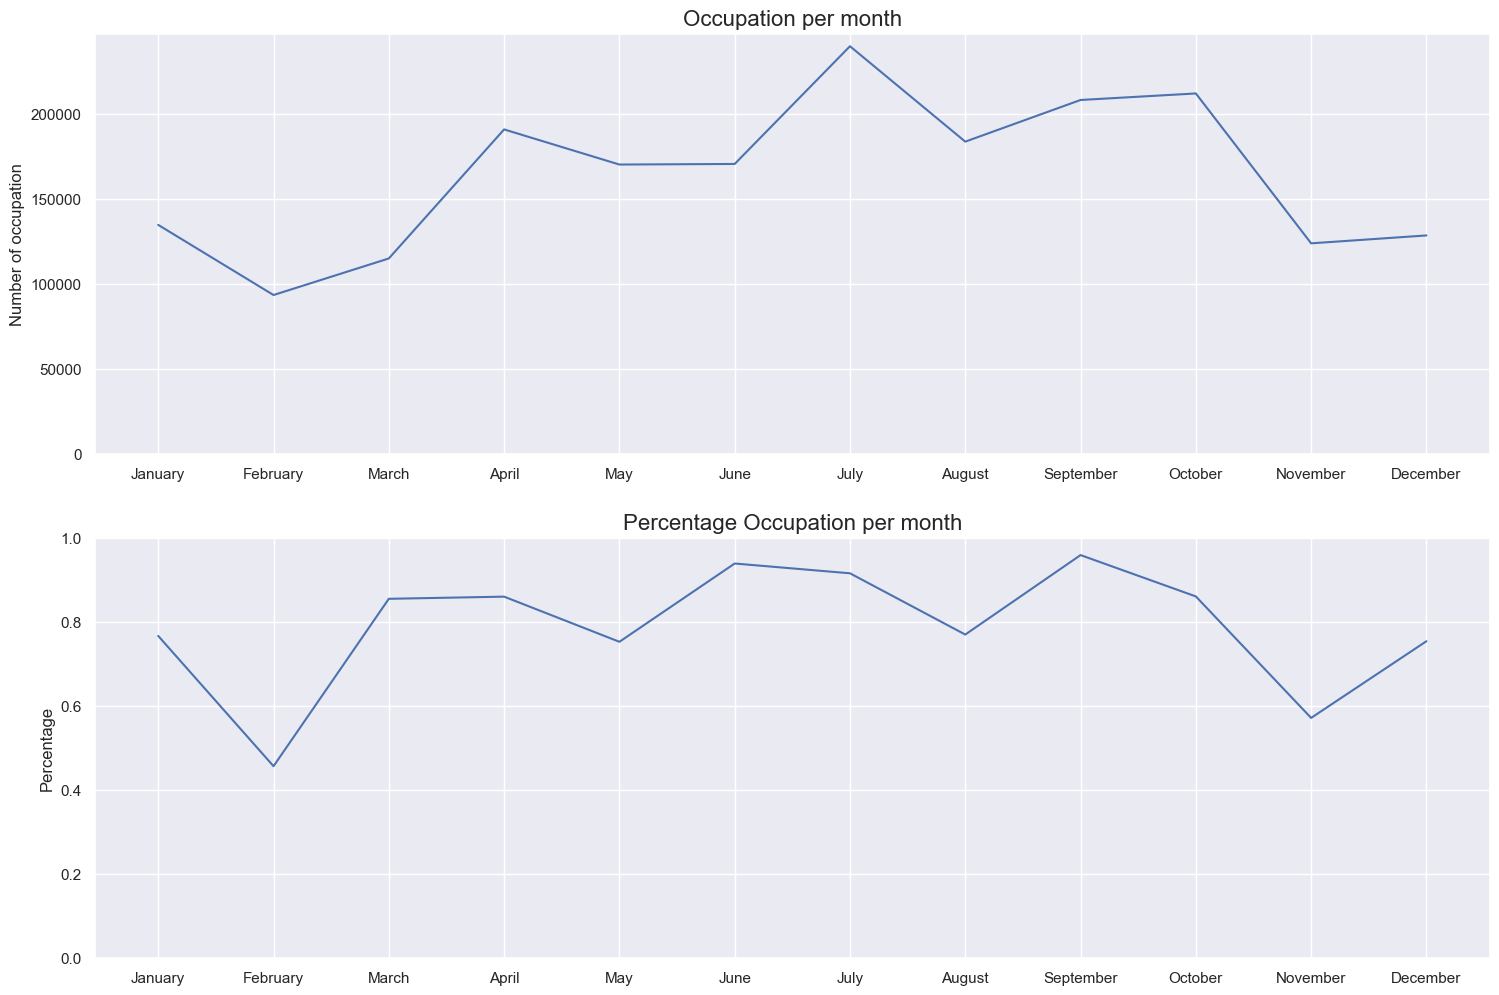

In [83]:
fig, axs = plt.subplots(2, 1, figsize=(18, 12))

_= sns.lineplot(y=occ_per_month['occupation'], x=occ_per_month['month'], ax=axs[0])
axs[0].set_title('Occupation per month', fontsize=16)
axs[0].set_xlabel('')
axs[0].set_ylabel('Number of occupation')
axs[0].set_ylim(0)

_= sns.lineplot(y=occ_per_month['perc_occupation'], x=occ_per_month['month'], ax=axs[1])
axs[1].set_title('Percentage Occupation per month', fontsize=16)
axs[1].set_xlabel('')
axs[1].set_ylabel('Percentage')
axs[1].set_ylim(0, 1)

plt.savefig('Graphs/total_occupation_monthly.png')
plt.show()

> Lets also see the distribution of the occupation nights a listing have per month

In [84]:
occup_nights = occupation_calendar \
                        .groupby(['listing_id', 'month']) \
                        .agg(
                            occ_nights=('available', 'count')
                        ) \
                        .unstack(0)['occ_nights'] \
                        .T
occup_nights

month                 1     2     3     4   5     6     7     8     9    10  \
listing_id                                                                    
10595               31.0  28.0  29.0   9.0 NaN  10.0  13.0  21.0   6.0  NaN   
10990               27.0   NaN   5.0   6.0 NaN   5.0   9.0   NaN   9.0  7.0   
10993               12.0   NaN   4.0   NaN NaN   4.0  15.0   9.0  30.0  9.0   
10995                7.0   2.0  27.0   NaN NaN   3.0   NaN   2.0   9.0  3.0   
27262               23.0   9.0   4.0  10.0 NaN   2.0   NaN   NaN   NaN  NaN   
...                  ...   ...   ...   ...  ..   ...   ...   ...   ...  ...   
983937080532919737   NaN   NaN   NaN   NaN NaN   NaN   NaN   NaN   3.0  NaN   
984280014002068815   NaN   NaN   NaN   NaN NaN   NaN   NaN   NaN   2.0  NaN   
984280014714317399   NaN   NaN   NaN   NaN NaN   NaN   NaN   NaN   2.0  NaN   
984280015206592938   NaN   NaN   NaN   NaN NaN   NaN   NaN   NaN   2.0  NaN   
984289252638695828   NaN   NaN   NaN   NaN NaN   NaN   NaN   NaN   1.0  NaN   

month               11    12  
listing_id                    
10595              NaN   5.0  
10990              NaN  12.0  
10993              NaN  28.0  
10995              NaN  17.0  
27262              NaN  11.0  
...                 ..   ...  
983937080532919737 NaN   NaN  
984280014002068815 NaN   NaN  
984280014714317399 NaN   NaN  
984280015206592938 NaN   NaN  
984289252638695828 NaN   NaN  

[14857 rows x 12 columns]

> Transform the month number to month name and visualize the results

In [85]:
occup_nights.columns = [calendar.month_name[i] for i in occup_nights.columns]

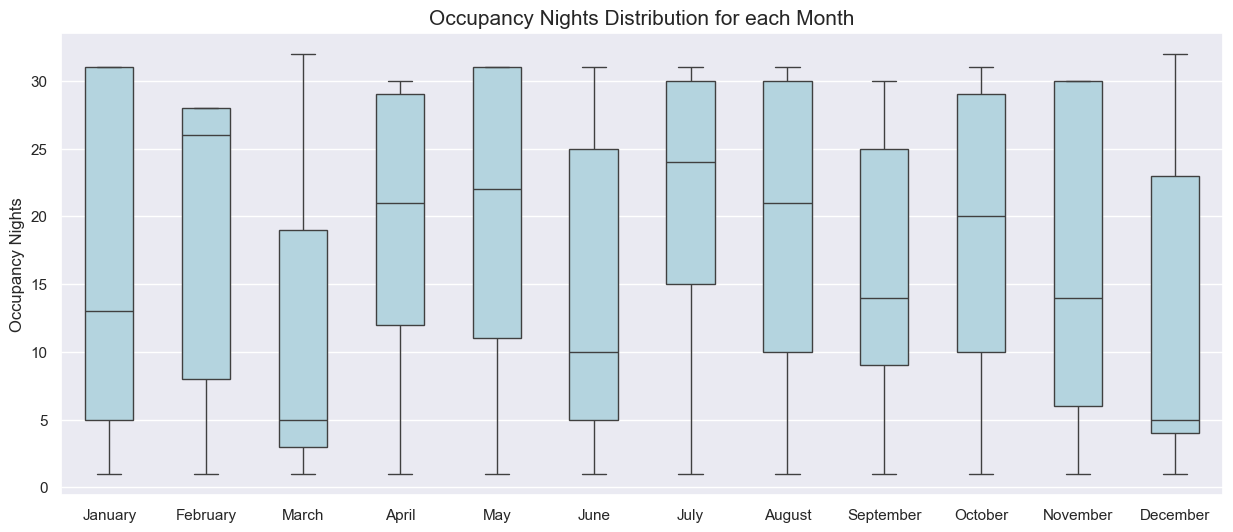

In [86]:
plt.figure(figsize=(15, 6))
           
ax = sns.boxplot(data=occup_nights, width=0.5, color='lightblue')
      
plt.title('Occupancy Nights Distribution for each Month', fontsize=15)
plt.xlabel(None)
plt.ylabel('Occupancy Nights')

plt.savefig('Graphs/occupation_night_monthly_distrib.png')
plt.show()

### Listings Income

> Cause we now have data about the occupied nights the listings had in every month lets check the income that comes from every listings according to the price and the adjusted price

In [87]:
income = occupation_calendar \
                .groupby(['listing_id', 'month']) \
                .agg(
                    occ_nights=('available', 'count'),
                    avg_price=('price', 'mean'),
                    avg_adj_price=('adjusted_price', 'mean')
                )
income['income'] = income['occ_nights'] * income['avg_price']
income['adj_income'] = income['occ_nights'] * income['avg_adj_price']

income

occ_nights   avg_price  avg_adj_price  income  \
listing_id         month                                                  
10595              1              31  177.000000     128.516129  5487.0   
                   2              28  177.000000     177.000000  4956.0   
                   3              29  171.689655     168.931034  4979.0   
                   4               9  122.666667     109.333333  1104.0   
                   6              10  192.000000     192.000000  1920.0   
...                              ...         ...            ...     ...   
983937080532919737 9               3   55.000000      55.000000   165.0   
984280014002068815 9               2  155.000000     155.000000   310.0   
984280014714317399 9               2  162.000000     162.000000   324.0   
984280015206592938 9               2  169.000000     169.000000   338.0   
984289252638695828 9               1   16.000000      16.000000    16.0   

                          adj_income  
listing_id         month              
10595              1          3984.0  
                   2          4956.0  
                   3          4899.0  
                   4           984.0  
                   6          1920.0  
...                              ...  
983937080532919737 9           165.0  
984280014002068815 9           310.0  
984280014714317399 9           324.0  
984280015206592938 9           338.0  
984289252638695828 9            16.0  

[117795 rows x 5 columns]

In [88]:
listings_income = income.reset_index('month')
listings_income.sort_values(by='month', ascending=True, inplace=True)
listings_income['month'] = [calendar.month_name[i] for i in listings_income['month']]
listings_income

month  occ_nights   avg_price  avg_adj_price  income  \
listing_id                                                                    
10595                January          31  177.000000     128.516129  5487.0   
33395366             January          31   35.000000      35.000000  1085.0   
33396369             January           1   37.000000      37.000000    37.0   
33396807             January          16   40.375000      40.375000   646.0   
33397194             January           9   35.111111      35.111111   316.0   
...                      ...         ...         ...            ...     ...   
746138771654576546  December           3   70.000000      68.000000   210.0   
35102775            December           3  153.000000     153.000000   459.0   
746130372390161103  December           4   67.000000      67.000000   268.0   
35102516            December           5  145.000000     145.000000   725.0   
13475160            December          17   51.294118      51.294118   872.0   

                    adj_income  
listing_id                      
10595                   3984.0  
33395366                1085.0  
33396369                  37.0  
33396807                 646.0  
33397194                 316.0  
...                        ...  
746138771654576546       204.0  
35102775                 459.0  
746130372390161103       268.0  
35102516                 725.0  
13475160                 872.0  

[117795 rows x 6 columns]

> Lets visualize the distribution of income

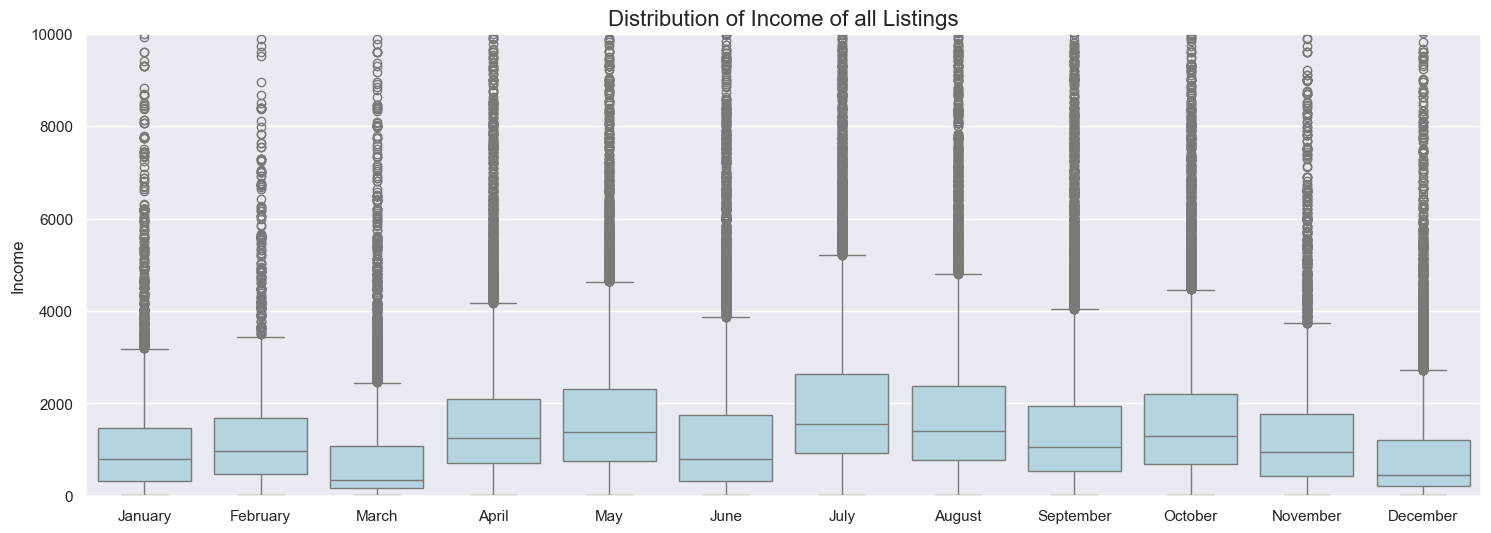

In [89]:
plt.figure(figsize=(18, 6))

_= sns.boxplot(x=listings_income['month'], y=listings_income['income'], color='lightblue')
plt.title('Distribution of Income of all Listings', fontsize=16)
plt.ylim(0, 10000)
plt.ylabel('Income')
plt.xlabel(None)

plt.savefig('Graphs/income_monthly_distrib.png')
plt.show()

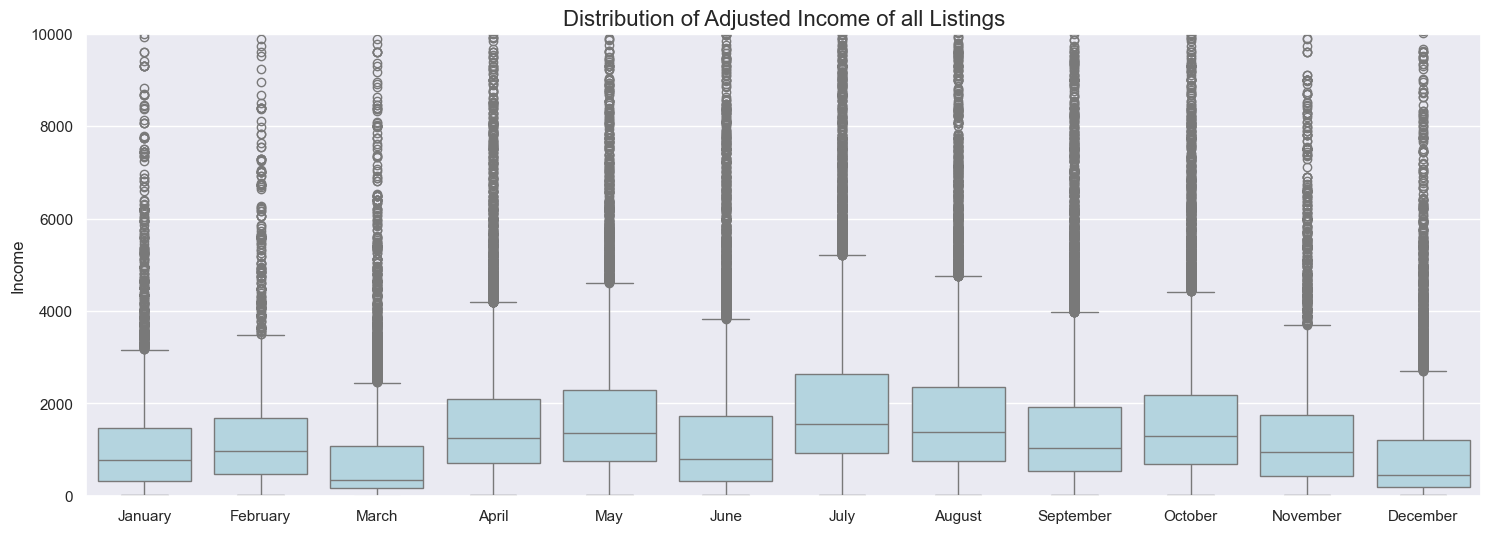

In [90]:
plt.figure(figsize=(18, 6))

_= sns.boxplot(x=listings_income['month'], y=listings_income['adj_income'], color='lightblue')
plt.title('Distribution of Adjusted Income of all Listings', fontsize=16)
plt.ylim(0, 10000)
plt.ylabel('Income')
plt.xlabel(None)

plt.savefig('Graphs/adjust_income_monthly_distrib.png')
plt.show()

> Lets also check the average income per month the listings have

In [91]:
income.reset_index(inplace=True)
income

listing_id  month  occ_nights   avg_price  avg_adj_price  \
0                    10595      1          31  177.000000     128.516129   
1                    10595      2          28  177.000000     177.000000   
2                    10595      3          29  171.689655     168.931034   
3                    10595      4           9  122.666667     109.333333   
4                    10595      6          10  192.000000     192.000000   
...                    ...    ...         ...         ...            ...   
117790  983937080532919737      9           3   55.000000      55.000000   
117791  984280014002068815      9           2  155.000000     155.000000   
117792  984280014714317399      9           2  162.000000     162.000000   
117793  984280015206592938      9           2  169.000000     169.000000   
117794  984289252638695828      9           1   16.000000      16.000000   

        income  adj_income  
0       5487.0      3984.0  
1       4956.0      4956.0  
2       4979.0      4899.0  
3       1104.0       984.0  
4       1920.0      1920.0  
...        ...         ...  
117790   165.0       165.0  
117791   310.0       310.0  
117792   324.0       324.0  
117793   338.0       338.0  
117794    16.0        16.0  

[117795 rows x 7 columns]

> Groupby month in order to take the average income

In [92]:
monthly_listing_income = income.groupby('month').mean().reset_index()
monthly_listing_income['month'] = [calendar.month_name[i] for i in monthly_listing_income['month']]
monthly_listing_income

month    listing_id  occ_nights   avg_price  avg_adj_price  \
0     January  1.681565e+17   15.965603   80.177419      79.581382   
1    February  1.406965e+17   18.600398   77.709019      77.133743   
2       March  2.133471e+17   11.077049   80.323340      79.137951   
3       April  2.148357e+17   19.558495   91.048104      90.289506   
4         May  1.991190e+17   19.934724  100.770862      99.875935   
5        June  2.879031e+17   13.876170   99.870346      98.294219   
6        July  2.822403e+17   21.269524  104.346703     103.273190   
7      August  2.561819e+17   19.373826  104.986648     103.732748   
8   September  3.453373e+17   15.916769   99.573360      97.898773   
9     October  3.231998e+17   19.052778   96.661450      95.720475   
10   November  2.716769e+17   16.774871   91.491235      90.534645   
11   December  2.318145e+17   11.578900   88.054223      86.702649   

         income   adj_income  
0   1159.899063  1154.489266  
1   1334.759562  1328.221315  
2    852.673963   845.190453  
3   1735.226187  1724.173485  
4   1881.232392  1868.665768  
5   1401.391761  1384.622649  
6   2177.229144  2157.715034  
7   1935.212348  1917.472190  
8   1590.182222  1567.148026  
9   1788.654648  1774.923035  
10  1430.642586  1420.610464  
11   977.001803   967.806402

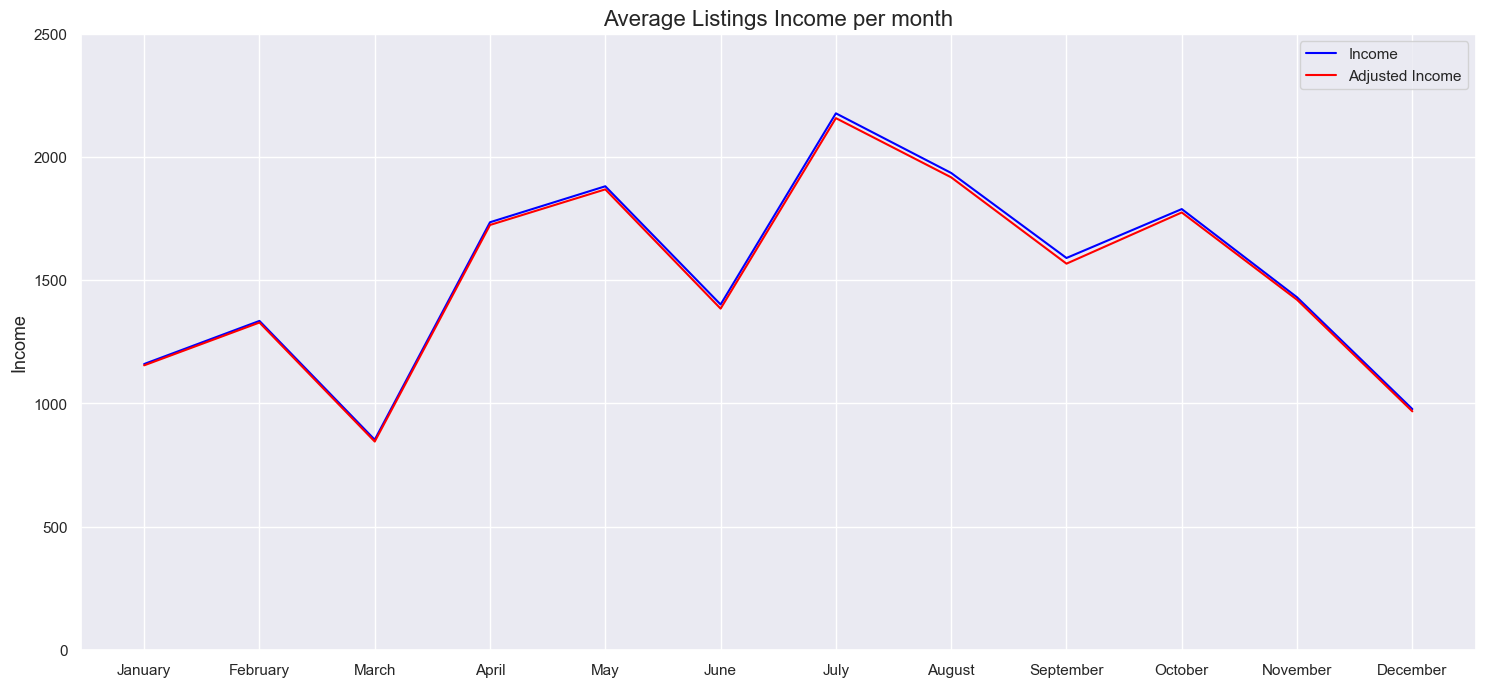

In [93]:
plt.figure(figsize=(18, 8))

_= sns.lineplot(data=monthly_listing_income, x='month', y='income', label='Income', color='blue')
_= sns.lineplot(data=monthly_listing_income, x='month', y='adj_income', label='Adjusted Income', color='red')

plt.title('Average Listings Income per month', fontsize=16)
plt.xlabel(None)
plt.ylabel('Income', fontsize=13)
plt.ylim(0, 2500)

plt.savefig('Graphs/average_monthly_income.png')
plt.show()

> If we sum up all the monthly average incomes we can take the yearly average income

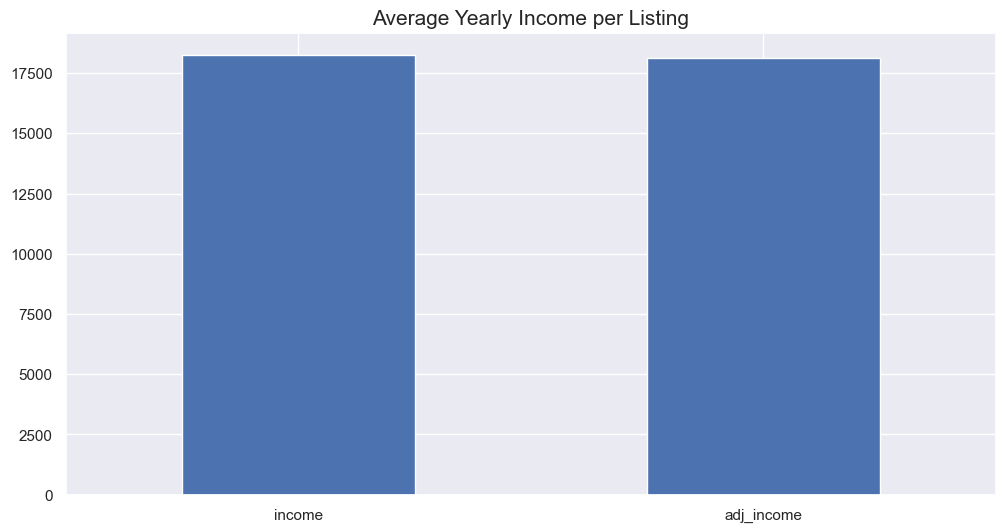

In [94]:
monthly_listing_income[['income', 'adj_income']].sum().plot(kind='bar', figsize=(12,6))

plt.xticks(rotation=0)
plt.title('Average Yearly Income per Listing', fontsize=15)

plt.savefig('Graphs/average_yearly_income.png')
plt.show()

### Neighbourhood Specs

> Lets also check some information about every neighbourhood. What we will do here is from the geojson file we have to visualize the neighbourhoods we will add some columns that is information about each neighbourhood and visualize them.

In [95]:
listings_income.reset_index(inplace=True)
listings_income.head()

listing_id    month  occ_nights   avg_price  avg_adj_price  income  \
0       10595  January          31  177.000000     128.516129  5487.0   
1    33395366  January          31   35.000000      35.000000  1085.0   
2    33396369  January           1   37.000000      37.000000    37.0   
3    33396807  January          16   40.375000      40.375000   646.0   
4    33397194  January           9   35.111111      35.111111   316.0   

   adj_income  
0      3984.0  
1      1085.0  
2        37.0  
3       646.0  
4       316.0

In [96]:
listings = pd.merge(listings,
                    listings_income.select_dtypes(include=np.number).groupby('listing_id').mean(),
                    left_on='id',
                    right_index=True,
                    how='inner'
                )
listings.head()

id                                               name  host_id  \
0  10595  Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...    37177   
1  10990  Rental unit in Athens · ★4.80 · 1 bedroom · 1 ...    37177   
2  10993  Rental unit in Athens · ★4.84 · Studio · 2 bed...    37177   
3  10995  Rental unit in Athens · ★4.80 · 1 bedroom · 2 ...    37177   
4  27262  Rental unit in Athens · ★4.81 · 1 bedroom · 1 ...    37177   

   host_name neighbourhood  latitude  longitude        room_type  price  \
0  Emmanouil   ΑΜΠΕΛΟΚΗΠΟΙ  37.98863   23.76527  Entire home/apt    144   
1  Emmanouil   ΑΜΠΕΛΟΚΗΠΟΙ  37.98903   23.76448  Entire home/apt     70   
2  Emmanouil   ΑΜΠΕΛΟΚΗΠΟΙ  37.98888   23.76473  Entire home/apt     85   
3  Emmanouil   ΑΜΠΕΛΟΚΗΠΟΙ  37.98903   23.76448  Entire home/apt     60   
4  Emmanouil   ΑΜΠΕΛΟΚΗΠΟΙ  37.98924   23.76500  Entire home/apt     85   

   number_of_reviews  calculated_host_listings_count  number_of_reviews_ltm  \
0                 42                               7                      8   
1                 66                               7                      3   
2                 92                               7                      5   
3                 30                               7                      1   
4                 21                               7                      2   

   occ_nights   avg_price  avg_adj_price       income   adj_income  
0   16.888889  188.039591     164.886722  3086.777778  2812.666667  
1   10.000000   74.208333      74.208333   753.625000   753.625000  
2   13.875000   70.102679      70.102679   966.875000   966.875000  
3    8.750000   74.668573      70.453237   613.625000   573.750000  
4    9.833333   76.424242      76.424242   733.166667   733.166667

In [97]:
neighb_specs = listings \
                    .groupby('neighbourhood') \
                    .agg(
                        num_listings=('id', 'nunique'),
                        avg_price=('price', 'mean'),
                        num_host=('host_id', 'nunique'),
                        income=('income', 'mean'),
                        adj_income=('adj_income', 'mean')
                    )
neighb_specs

num_listings   avg_price  num_host  \
neighbourhood                                                          
1Ο ΝΕΚΡΟΤΑΦΕΙΟ                              53   99.566038        41   
ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ                            38   43.736842        30   
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ           808   76.000000       421   
ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ                              95   52.905263        76   
ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ                           75   61.733333        56   
ΑΚΡΟΠΟΛΗ                                   378  125.351852       277   
ΑΜΠΕΛΟΚΗΠΟΙ                                448   67.116071       323   
ΑΝΩ ΚΥΨΕΛΗ                                 117   46.000000        95   
ΑΝΩ ΠΑΤΗΣΙΑ                                 63   56.126984        60   
ΒΟΤΑΝΙΚΟΣ                                   79   78.240506        59   
ΓΚΑΖΙ                                      106   95.792453        60   
ΓΚΥΖΗ                                      115   51.530435        91   
ΓΟΥΒΑ                                       75   72.240000        65   
ΓΟΥΔΙ                                      230   68.952174       154   
ΕΛΛΗΝΟΡΩΣΩΝ                                 72   81.611111        55   
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ                    2391  129.705563       866   
ΖΑΠΠΕΙΟ                                    158  164.234177        97   
ΘΗΣΕΙΟ                                     383  121.819843       254   
ΙΛΙΣΙΑ                                     214   87.331776       152   
ΚΕΡΑΜΕΙΚΟΣ                                 340  115.991176       166   
ΚΟΛΟΚΥΝΘΟΥ                                  16   43.937500        14   
ΚΟΛΩΝΑΚΙ                                   420  128.271429       290   
ΚΟΛΩΝΟΣ                                    107   51.943925        88   
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ                       1117  117.645479       613   
ΚΥΨΕΛΗ                                     270   62.522222       178   
ΛΥΚΑΒΗΤΤΟΣ                                 162  104.561728       129   
ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ                   971   87.375901       550   
ΝΕΑ ΚΥΨΕΛΗ                                  64   56.453125        58   
ΝΕΟΣ ΚΟΣΜΟΣ                                974   87.400411       616   
ΝΙΡΒΑΝΑ                                    172   53.197674       113   
ΠΑΓΚΡΑΤΙ                                   504   79.926587       349   
ΠΑΤΗΣΙΑ                                    161   51.627329       111   
ΠΕΔΙΟ ΑΡΕΩΣ                                106   76.113208        76   
ΠΕΝΤΑΓΩΝΟ                                    2   46.000000         2   
ΠΕΤΡΑΛΩΝΑ                                  350   86.728571       230   
ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ                           176   52.642045       151   
ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ                            574   62.611498       347   
ΠΟΛΥΓΩΝΟ                                    28   53.607143        25   
ΠΡΟΜΠΟΝΑ                                    12   60.833333        11   
ΡΗΓΙΛΛΗΣ                                     4  109.750000         4   
ΡΙΖΟΥΠΟΛΗ                                   13   52.538462        11   
ΣΕΠΟΛΙΑ                                     43   55.930233        34   
ΣΤΑΔΙΟ                                     250   84.728000       181   
ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ                             85   61.564706        68   

                                       income   adj_income  
neighbourhood                                               
1Ο ΝΕΚΡΟΤΑΦΕΙΟ                    1311.519621  1311.121870  
ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ                   478.497335   479.130011  
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ  1036.571538  1031.164899  
ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ                     722.675235   729.179132  
ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ                 1028.181872  1027.423517  
ΑΚΡΟΠΟΛΗ                          2002.411987  1993.479967  
ΑΜΠΕΛΟΚΗΠΟΙ                        884.651433   882.395899  
ΑΝΩ ΚΥΨΕΛΗ                         688.326216   693.072581  
ΑΝΩ ΠΑΤΗΣΙΑ                        863.004781   859.817341  
ΒΟΤΑΝΙΚΟΣ                         1193.284667  118

In [98]:
athens_geo = gpd.read_file('Datasets/neighbourhoods.geojson')
athens_geo.drop(columns=['neighbourhood_group'], inplace=True)
athens_geo.head()

neighbourhood  \
0                    1Ο ΝΕΚΡΟΤΑΦΕΙΟ   
1                  ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ   
2  ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ   
3                    ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ   
4                 ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ   

                                            geometry  
0  MULTIPOLYGON (((23.74251 37.96321, 23.74250 37...  
1  MULTIPOLYGON (((23.73580 38.02347, 23.73345 38...  
2  MULTIPOLYGON (((23.72923 37.98885, 23.72855 37...  
3  MULTIPOLYGON (((23.73376 38.00839, 23.73363 38...  
4  MULTIPOLYGON (((23.71199 37.99614, 23.71249 37...

In [99]:
athens_geo = pd.merge(athens_geo,
                      neighb_specs,
                      left_on='neighbourhood',
                      right_index=True,
                      how='inner'
                     )
athens_geo['income'] = round(athens_geo['income'], 0)
athens_geo

neighbourhood  \
0                     1Ο ΝΕΚΡΟΤΑΦΕΙΟ   
1                   ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ   
2   ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ   
3                     ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ   
4                  ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ   
5                           ΑΚΡΟΠΟΛΗ   
6                        ΑΜΠΕΛΟΚΗΠΟΙ   
7                         ΑΝΩ ΚΥΨΕΛΗ   
8                        ΑΝΩ ΠΑΤΗΣΙΑ   
9                          ΒΟΤΑΝΙΚΟΣ   
10                             ΓΚΑΖΙ   
11                             ΓΚΥΖΗ   
12                             ΓΟΥΒΑ   
13                             ΓΟΥΔΙ   
14                       ΕΛΛΗΝΟΡΩΣΩΝ   
15            ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ   
16                           ΖΑΠΠΕΙΟ   
17                            ΘΗΣΕΙΟ   
18                            ΙΛΙΣΙΑ   
19                        ΚΕΡΑΜΕΙΚΟΣ   
20                        ΚΟΛΟΚΥΝΘΟΥ   
21                          ΚΟΛΩΝΑΚΙ   
22                           ΚΟΛΩΝΟΣ   
23               ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ   
24                            ΚΥΨΕΛΗ   
25                        ΛΥΚΑΒΗΤΤΟΣ   
26          ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ   
27                        ΝΕΑ ΚΥΨΕΛΗ   
28                       ΝΕΟΣ ΚΟΣΜΟΣ   
29                           ΝΙΡΒΑΝΑ   
30                          ΠΑΓΚΡΑΤΙ   
31                           ΠΑΤΗΣΙΑ   
32                       ΠΕΔΙΟ ΑΡΕΩΣ   
33                         ΠΕΝΤΑΓΩΝΟ   
34                         ΠΕΤΡΑΛΩΝΑ   
35                  ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ   
36                   ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ   
37                          ΠΟΛΥΓΩΝΟ   
38                          ΠΡΟΜΠΟΝΑ   
39                          ΡΗΓΙΛΛΗΣ   
40                         ΡΙΖΟΥΠΟΛΗ   
42                           ΣΕΠΟΛΙΑ   
43                            ΣΤΑΔΙΟ   
44                   ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ   

                                             geometry  num_listings  \
0   MULTIPOLYGON (((23.74251 37.96321, 23.74250 37...            53   
1   MULTIPOLYGON (((23.73580 38.02347, 23.73345 38...            38   
2   MULTIPOLYGON (((23.72923 37.98885, 23.72855 37...           808   
3   MULTIPOLYGON (((23.73376 38.00839, 23.73363 38...            95   
4   MULTIPOLYGON (((23.71199 37.99614, 23.71249 37...            75   
5   MULTIPOLYGON (((23.72432 37.97559, 23.72405 37...           378   
6   MULTIPOLYGON (((23.76916 37.99822, 23.76928 37...           448   
7   MULTIPOLYGON (((23.74582 38.00798, 23.74663 38...           117   
8   MULTIPOLYGON (((23.73994 38.02293, 23.74302 38...            63   
9   MULTIPOLYGON (((23.69862 37.99356, 23.70137 37...            79   
10  MULTIPOLYGON (((23.71587 37.97841, 23.71513 37...           106   
11  MULTIPOLYGON (((23.75370 37.99441, 23.75394 37...           115   
12  MULTIPOLYGON (((23.74755 37.95728, 23.74697 37...            75   
13  MULTIPOLYGON (((23.79056 37.99146, 23.79054 37...           230   
14  MULTIPOLYGON (((23.77832 37.99801, 23.77835 37...            72   
15  MULTIPOLYGON (((23.73082 37.98582, 23.73181 37...          2391   
16  MULTIPOLYGON (((23.74062 37.97562, 23.74023 37...           158   
17  MULTIPOLYGON (((23.72354 37.97706, 23.72281 37...           383   
18  MULTIPOLYGON (((23.75789 37.97512, 23.75922 37...           214   
19  MULTIPOLYGON (((23.71647 37.98425, 23.71937 37...           340   
20  MULTIPOLYGON (((23.71589 38.00233, 23.71503 38...            16   
21  MULTIPOLYGON (((23.75532 37.98111, 23.75495 37...           420   
22  MULTIPOLYGON (((23.71905 38.00187, 23.71922 38...           107   
23  MULTIPOLYGON (((23.73134 37.96807, 23.73071 37...          1117   
24  MULTIPOLYGON (((23.74660 38.00356, 23.74647 38...           270   
25  MULTIPOLYGON (((23.75227 37.98599, 23.75217 37...           162   
26  MULTIPOLYGON (((23.73136 37.99177, 23.73567 37...           971   
27  MULTIPOLYGON (((23.75071 38.00415, 23.75065 38...            64   
28  MULTIPOLYGON (((23.73134 37.96658, 23.73155 37...           974   
29  MULTIPOLYGON (((23.72830 38.01671, 23.72844 38...           172   
30  MULTIPOLYGON (((2

In [100]:
# Creating the map
athens_neigh_specs = folium.Map(location=[37.9838, 23.7275],
                                 zoom_start=12,
                                 max_zoom=15,
                                 min_zoom=12)

def style_function(feature):
    return {
        'fillOpacity': 0.4,
        'color': 'midnightblue',
        'weight': .7
    }

tooltip = folium.GeoJsonTooltip(fields=['neighbourhood',
                                        'num_listings',
                                        'num_host',
                                        'income'],
                                aliases=['Neighbourhood:',
                                         'Number of Listings:',
                                         'Number of Hosts:',
                                         'AVG List Income (€):']
                               )


# Creating the popup
folium.GeoJson(athens_geo,
               tooltip=tooltip,
               zoom_on_click=True,
               style_function=style_function
).add_to(athens_neigh_specs)

athens_neigh_specs.save('Graphs/neighbourhood_specs.html')
athens_neigh_specs

### Pricing per day

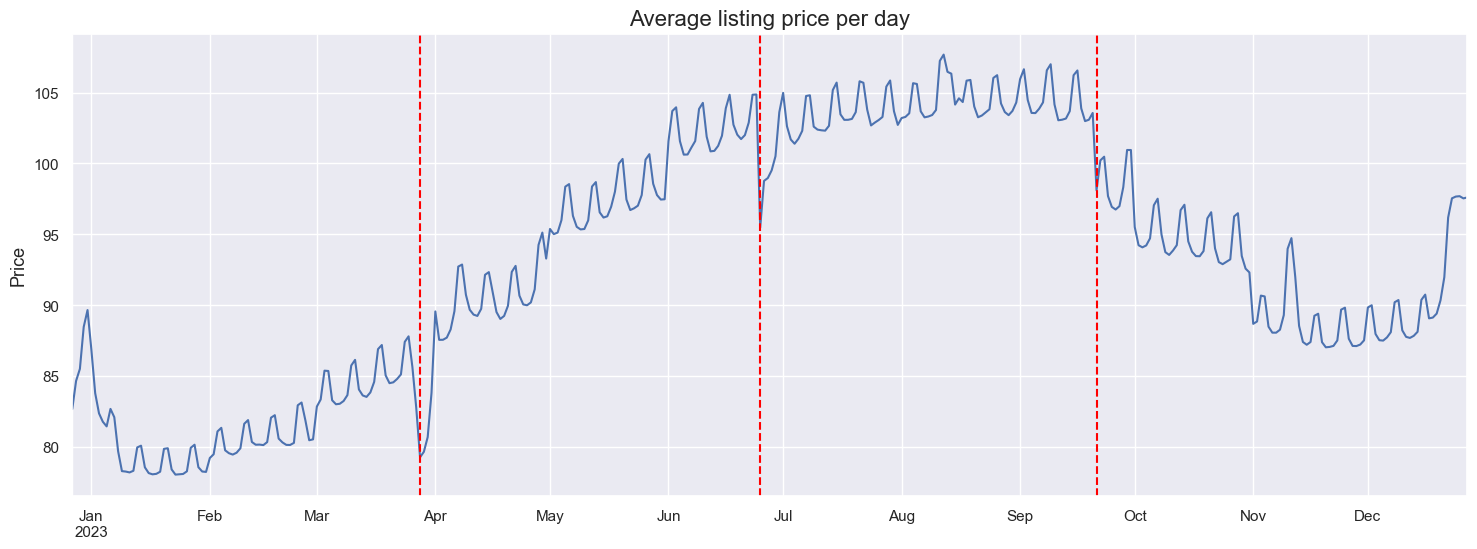

In [101]:
calendar_df.groupby('date').agg(avg_price=('price', 'mean')).plot(figsize=(18, 6))

plt.legend().set_visible(False)
plt.title('Average listing price per day', fontsize=16)
plt.xlabel(None)
plt.ylabel('Price', fontsize=13)

# Annotations
plt.axvline(x='2023-03-28', color='red', linestyle='--')
plt.axvline(x='2023-06-25', color='red', linestyle='--')
plt.axvline(x='2023-09-21', color='red', linestyle='--')

plt.savefig('Graphs/average_daily_price.png')
plt.show()

### Host's Income

In [102]:
host_income = pd.merge(income,
                       listings[['id', 'host_id']],
                       left_on='listing_id',
                       right_on='id',
                       how='inner'
                      ).drop(columns=['id'])
host_income.head()

listing_id  month  occ_nights   avg_price  avg_adj_price  income  \
0       10595      1          31  177.000000     128.516129  5487.0   
1       10595      2          28  177.000000     177.000000  4956.0   
2       10595      3          29  171.689655     168.931034  4979.0   
3       10595      4           9  122.666667     109.333333  1104.0   
4       10595      6          10  192.000000     192.000000  1920.0   

   adj_income  host_id  
0      3984.0    37177  
1      4956.0    37177  
2      4899.0    37177  
3       984.0    37177  
4      1920.0    37177

In [103]:
host_income = host_income[['host_id', 'month', 'occ_nights', 'income']] \
                            .groupby(['host_id', 'month']) \
                            .agg(sum) \
                            .reset_index()
host_income

C:\Users\user\AppData\Local\Temp\ipykernel_9976\3631739492.py:3: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  .agg(sum) \


host_id  month  occ_nights  income
0           1805      4          12   404.0
1           1805      5          26   968.0
2           1805      6           1    65.0
3           1805      7          11   751.0
4           1805      9           6   270.0
...          ...    ...         ...     ...
51642  537356944      9           1    55.0
51643  537542347      9           7   490.0
51644  537542347     10           3   210.0
51645  537543834      9           7   735.0
51646  537543834     10           2   210.0

[51647 rows x 4 columns]

In [104]:
host_income['income'].describe()

count     51647.000000
mean       3249.507600
std        9334.029858
min          13.000000
25%         600.000000
50%        1285.000000
75%        2514.000000
max      298364.000000
Name: income, dtype: float64

In [105]:
host_income = host_income.assign(
                    income_category= pd.cut(
                        host_income['income'],
                        bins=[0, 500, 1000, 2000, 5000, 10000, 25000, 50000, 100000, host_income['income'].max()],
                        labels=['0-500', '500-1000', '1000-2000', '2000-5000', '5000-10000', '10000-25000', '25000-50000', '50000-100000', '100000+'],
                        right=True
                    )
)
host_income

host_id  month  occ_nights  income income_category
0           1805      4          12   404.0           0-500
1           1805      5          26   968.0        500-1000
2           1805      6           1    65.0           0-500
3           1805      7          11   751.0        500-1000
4           1805      9           6   270.0           0-500
...          ...    ...         ...     ...             ...
51642  537356944      9           1    55.0           0-500
51643  537542347      9           7   490.0           0-500
51644  537542347     10           3   210.0           0-500
51645  537543834      9           7   735.0        500-1000
51646  537543834     10           2   210.0           0-500

[51647 rows x 5 columns]

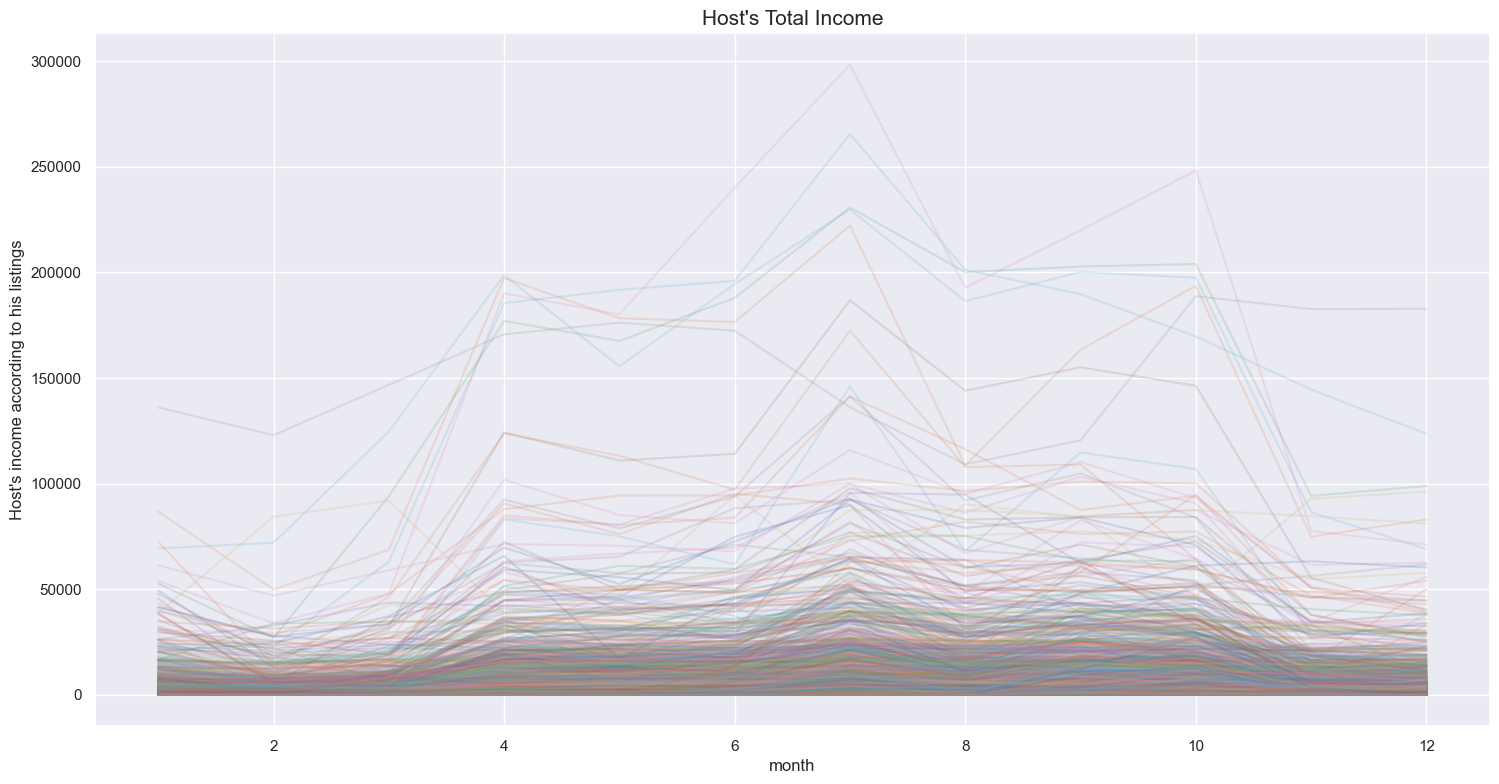

In [106]:
_= host_income[['host_id', 'month', 'income']] \
                .set_index(['host_id', 'month']) \
                .unstack('month') \
                .fillna(0)['income'] \
                .T \
                .plot(figsize=(18,9), alpha=.2)

plt.legend().set_visible(False)
plt.title("Host's Total Income", fontsize=15)
plt.ylabel("Host's income according to his listings")

plt.savefig('Graphs/hosts_total_monthly_income.png')
plt.show()

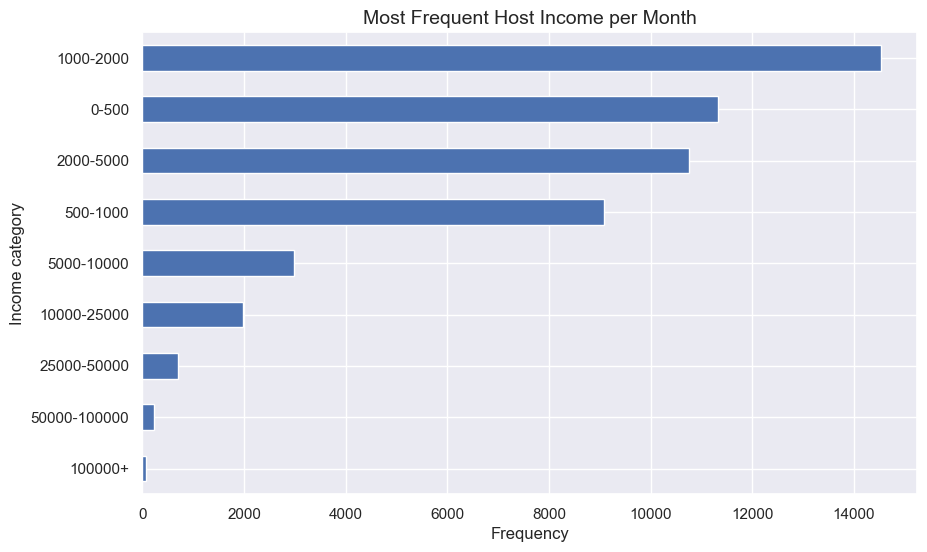

In [107]:
host_income['income_category'] \
            .value_counts() \
            .sort_values() \
            .plot(kind='barh', figsize=(10, 6))

plt.title("Most Frequent Host Income per Month", fontsize=14)
plt.xlabel("Frequency")
plt.ylabel("Income category")

plt.savefig('Graphs/frequent_monthly_host_income.png')
plt.show()

> Lets also check the average host income per month compared to the average listing income per month.

In [108]:
monthly_host_income = host_income[['month', 'host_id', 'income']] \
                                        .groupby('month') \
                                        .agg('mean')['income'] \
                                        .reset_index()
monthly_host_income

month       income
0       1  2253.970844
1       2  2192.025909
2       3  1674.855843
3       4  3746.192515
4       5  3928.376525
5       6  3047.315026
6       7  4762.813859
7       8  4005.176687
8       9  3577.265606
9      10  3905.961948
10     11  2789.150903
11     12  2214.158693

In [109]:
monthly_host_income['month'] = [calendar.month_name[i] for i in monthly_host_income['month']]

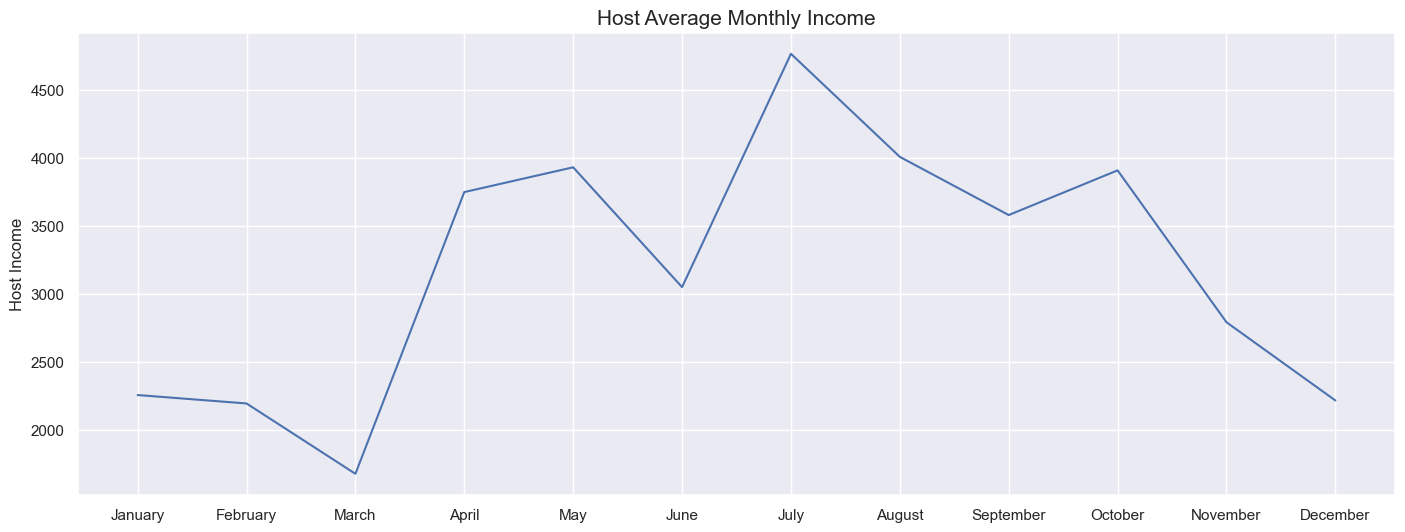

In [110]:
plt.figure(figsize=(17, 6))
_= sns.lineplot(data=monthly_host_income, x='month', y='income')

plt.xlabel(None)
plt.ylabel('Host Income')
plt.title('Host Average Monthly Income', fontsize=15)

plt.savefig('Graphs/host_average_monthly_income.png')
plt.show()

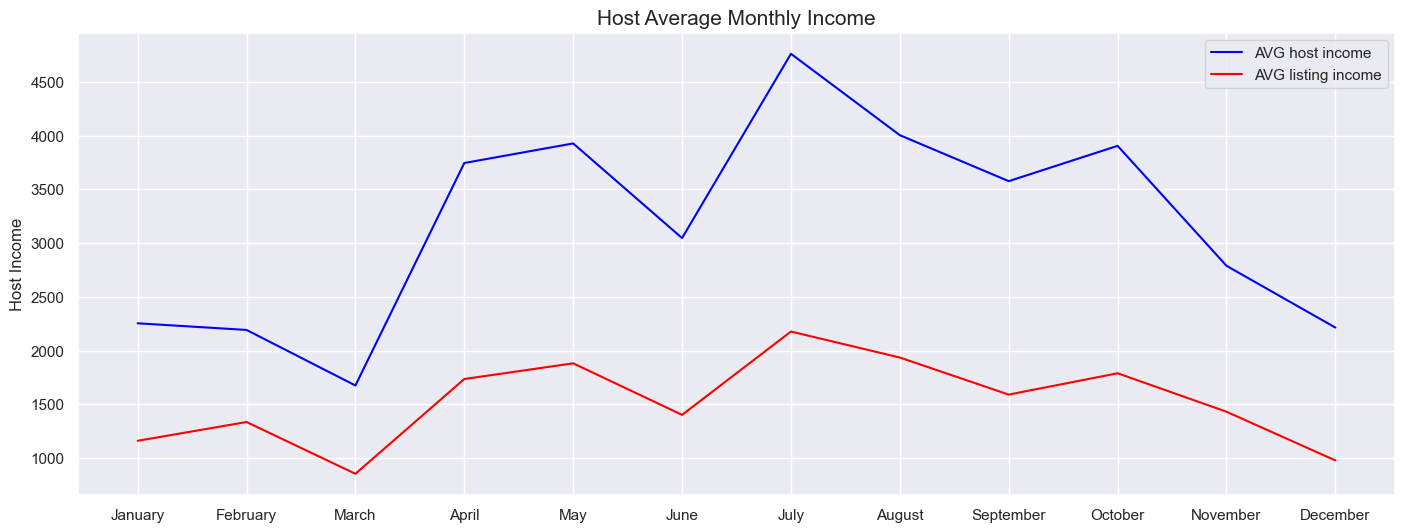

In [111]:
plt.figure(figsize=(17, 6))
_= sns.lineplot(data=monthly_host_income, x='month', y='income', label='AVG host income', color='blue')
_= sns.lineplot(data=monthly_listing_income, x='month', y='income', label='AVG listing income', color='red')

plt.xlabel(None)
plt.ylabel('Host Income')
plt.title('Host Average Monthly Income', fontsize=15)

plt.savefig('Graphs/host_vs_listing_average_monthly_income.png')
plt.show()

### Reviews Overview

In [112]:
reviews = reviews.query('year>2020')
reviews

listing_id       date  year  month  day
25                   10595 2021-06-11  2021      6   11
26                   10595 2021-06-21  2021      6   21
27                   10595 2021-06-24  2021      6   24
28                   10595 2021-07-01  2021      7    1
29                   10595 2021-07-10  2021      7   10
...                    ...        ...   ...    ...  ...
630573  975966554881091774 2023-09-13  2023      9   13
630574  976076532701121190 2023-09-16  2023      9   16
630575  977373669051180593 2023-09-15  2023      9   15
630576  977373669051180593 2023-09-20  2023      9   20
630577  979596287508787842 2023-09-18  2023      9   18

[363248 rows x 5 columns]

In [113]:
yearly_revs = reviews.groupby(['listing_id', 'year']) \
                        .agg(
                            yearly_rev=('year', 'count')
                        ) \
                        .unstack(1)['yearly_rev']
yearly_revs

year                2021  2022  2023
listing_id                          
10595                7.0   2.0   8.0
10990               11.0   9.0   3.0
10993               22.0  11.0   5.0
10995                4.0   2.0   1.0
27262                NaN   2.0   2.0
...                  ...   ...   ...
975413215364080586   NaN   NaN   4.0
975966554881091774   NaN   NaN   1.0
976076532701121190   NaN   NaN   1.0
977373669051180593   NaN   NaN   2.0
979596287508787842   NaN   NaN   1.0

[10358 rows x 3 columns]

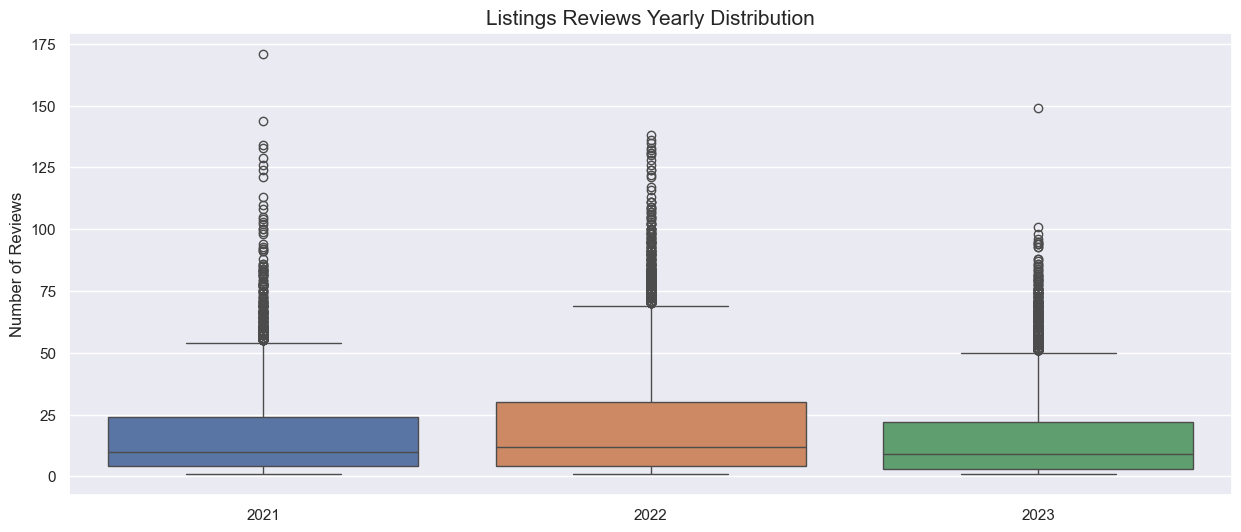

In [114]:
plt.figure(figsize=(15,6))
_= sns.boxplot(data=yearly_revs)

plt.xlabel(None)
plt.title('Listings Reviews Yearly Distribution', fontsize=15)
plt.ylabel('Number of Reviews')

plt.savefig('Graphs/yearly_reviews_distrib.png')
plt.show()

### Reviews Word Cloud

In [115]:
reviews_detailed = pd.read_csv('Datasets/reviews_detailed.csv')
reviews_detailed.head()

listing_id        id        date  reviewer_id reviewer_name  \
0       10595    271535  2011-05-20       189305        Pamela   
1       10595   1994237  2012-08-15       289831        Andrey   
2       10595   4678609  2013-05-20      2635427         Ahmet   
3       10595  12502994  2014-05-04      2422327          Hema   
4       10595  19482948  2014-09-13      6737784       Mariana   

                                            comments  
0  The apartment was wonderful, fully equiped, be...  
1  Emmanouil was an excellent host. He provided u...  
2  Manos is a very good host, he is kind and help...  
3  Our stay in Emmanouil home was comfortable, qu...  
4  Fantastic accommodation very well located to v...

In [116]:
reviews_detailed['date'] = pd.to_datetime(reviews_detailed['date'])
reviews_detailed['year'] = reviews_detailed['date'].dt.year
reviews_detailed['month'] = reviews_detailed['date'].dt.month
reviews_detailed['day'] = reviews_detailed['date'].dt.day

reviews_detailed.head()

listing_id        id       date  reviewer_id reviewer_name  \
0       10595    271535 2011-05-20       189305        Pamela   
1       10595   1994237 2012-08-15       289831        Andrey   
2       10595   4678609 2013-05-20      2635427         Ahmet   
3       10595  12502994 2014-05-04      2422327          Hema   
4       10595  19482948 2014-09-13      6737784       Mariana   

                                            comments  year  month  day  
0  The apartment was wonderful, fully equiped, be...  2011      5   20  
1  Emmanouil was an excellent host. He provided u...  2012      8   15  
2  Manos is a very good host, he is kind and help...  2013      5   20  
3  Our stay in Emmanouil home was comfortable, qu...  2014      5    4  
4  Fantastic accommodation very well located to v...  2014      9   13

In [117]:
reviews_detailed = reviews_detailed.query('date > "2022-09-21"')
reviews_detailed.reset_index(drop=True, inplace=True)
reviews_detailed.head()

listing_id                  id       date  reviewer_id reviewer_name  \
0       10595  809238321997045296 2023-01-21     14324579      Katerina   
1       10595  818634148446148025 2023-02-03    309898465      Γεωργιος   
2       10595  827398467488043694 2023-02-15    136171956        Sohiel   
3       10595  828760825421962230 2023-02-17    501305168     Guillaume   
4       10595  849045143329198236 2023-03-17    259418214  Chrisostomos   

                                            comments  year  month  day  
0  The apartment was clean and warm (it’s importa...  2023      1   21  
1  Καθαρό και μεγάλο σπίτι - θέρμανση και ζεστό ν...  2023      2    3  
2  Highly recommended. Easy access . Good hosting...  2023      2   15  
3  Nice place very quiet.<br/>Emmanouil is everyt...  2023      2   17  
4  Εξαιρετικό και πεντακάθαρο διαμέρισμα. Πάρα πο...  2023      3   17

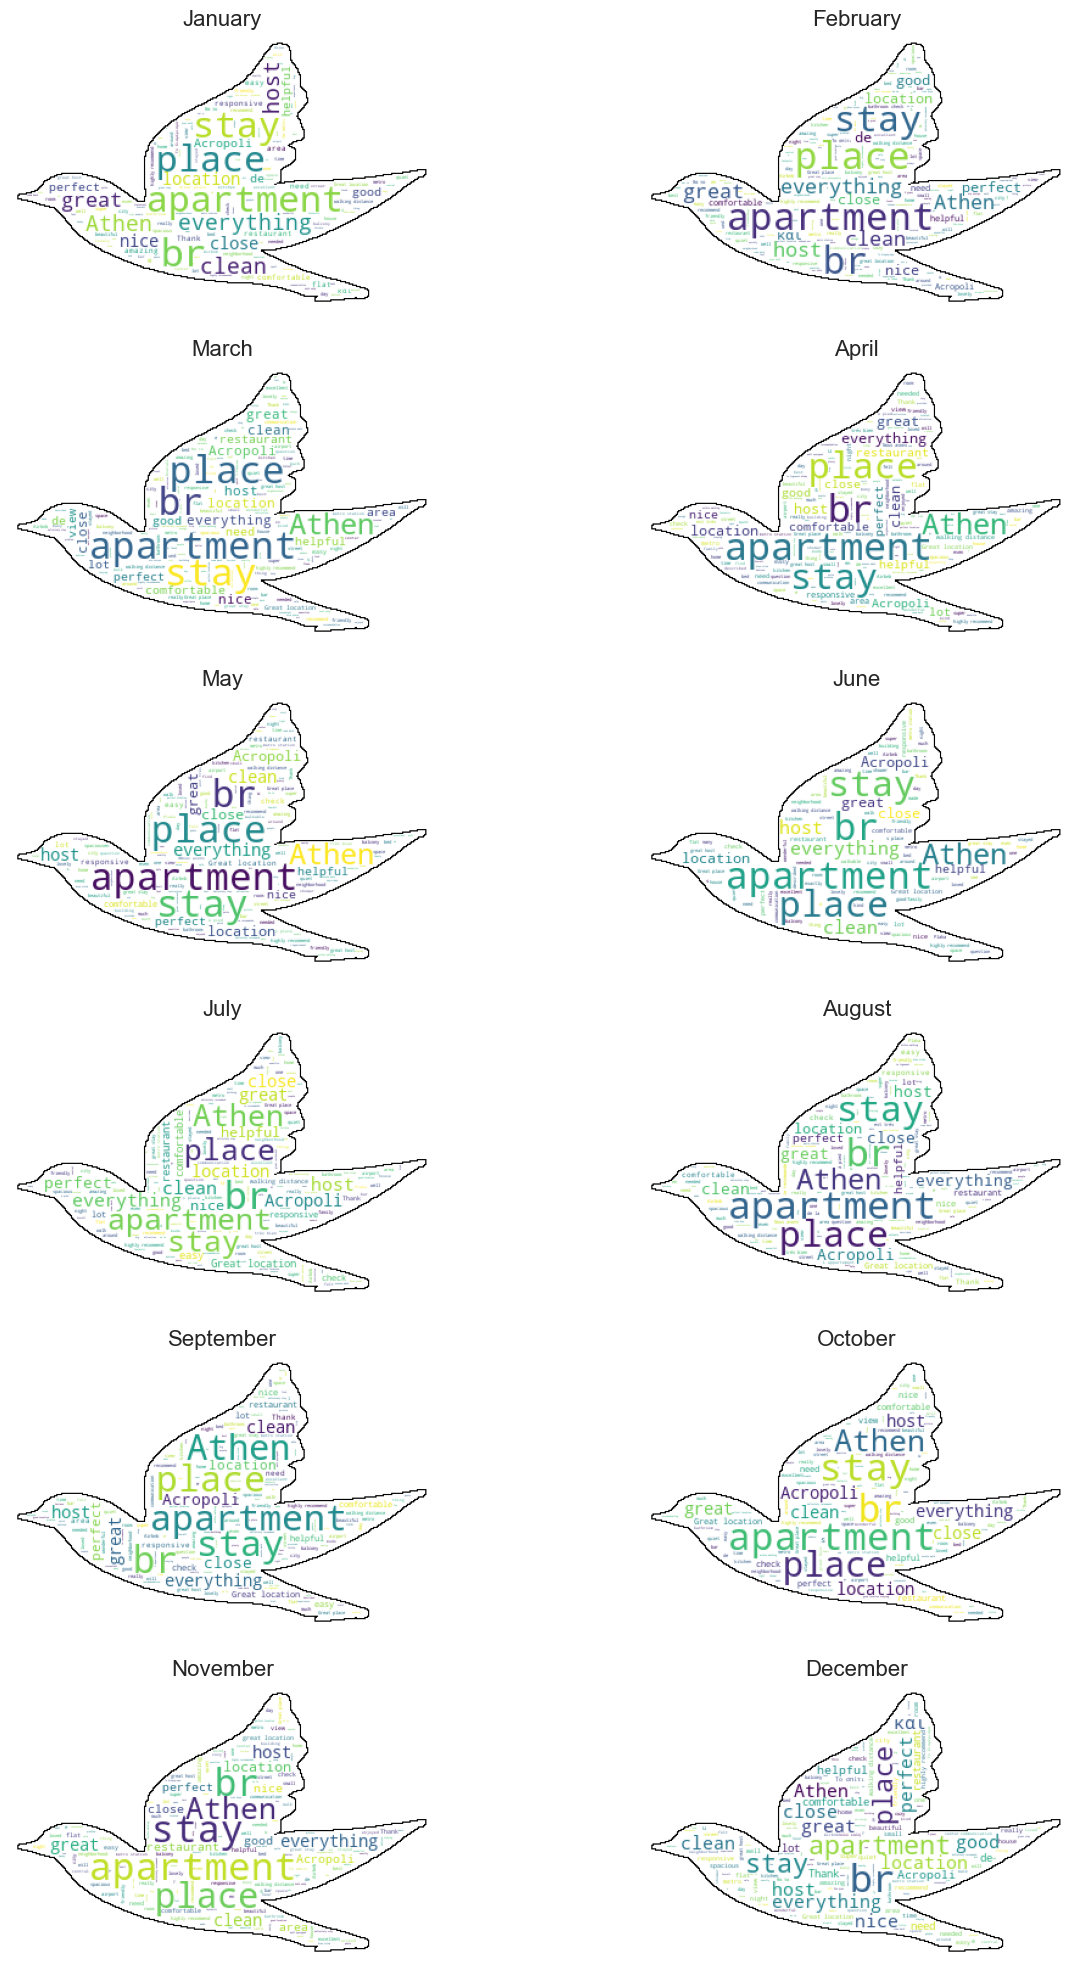

In [118]:
fig, axs = plt.subplots(6, 2, figsize=(15, 25))

reviews_detailed['comments'] = reviews_detailed['comments'].astype(str)

dove_mask = np.array(Image.open("Datasets/dove.png"))

month = 1
for i in range(6):
    for j in range(2):
        monthly_reviews = reviews_detailed.query(f'month == {month}')
        all_comments =  ' '.join(comment for comment in monthly_reviews['comments'])
        
        wordcloud = WordCloud(background_color='white',
                              repeat=True,
                              mask=dove_mask,
                              contour_color='black',
                              contour_width=.5,
                              min_font_size=2,
                             )
        
        # Generate a wordcloud
        wordcloud.generate(all_comments)
        
        # Plot it
        axs[i, j].imshow(wordcloud)
        axs[i, j].axis('off')
        month_name = calendar.month_name[month]
        axs[i, j].set_title(f'{month_name}', fontsize=16)
        month += 1
        

plt.savefig('Graphs/world_cloud_ltm.png')
plt.show()

### Reviews per month

In [119]:
monthly_reviews = reviews.groupby(['listing_id', 'month']).agg('count').reset_index()
monthly_reviews.sort_values(by='month', inplace=True)
monthly_reviews

listing_id  month  date  year  day
0           10595      1     1     1    1
6064     16221281      1     1     1    1
49045    54384955      1     3     3    3
23594    32814756      1     8     8    8
23618    32832202      1     2     2    2
...           ...    ...   ...   ...  ...
23924    33096812     12     7     7    7
27680    35482681     12     2     2    2
32350    40055399     12     3     3    3
45496    52104425     12     1     1    1
33020    40756424     12     2     2    2

[69923 rows x 5 columns]

In [120]:
monthly_reviews['month'] = [calendar.month_name[i] for i in monthly_reviews['month']]
monthly_reviews.head()

listing_id    month  date  year  day
0           10595  January     1     1    1
6064     16221281  January     1     1    1
49045    54384955  January     3     3    3
23594    32814756  January     8     8    8
23618    32832202  January     2     2    2

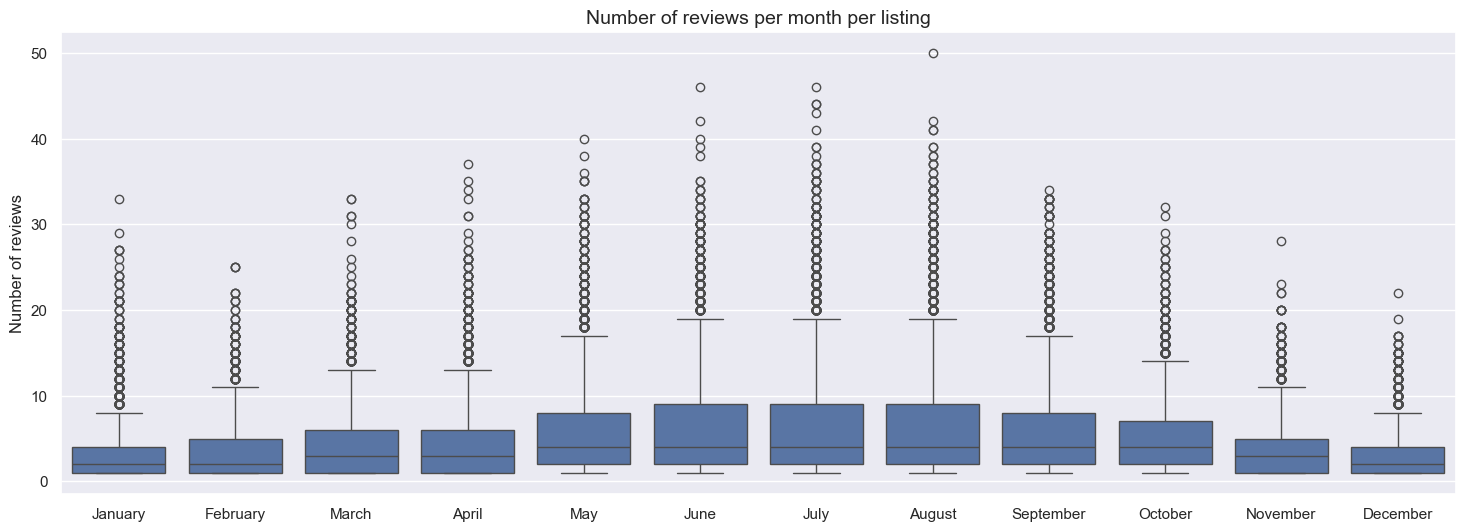

In [121]:
plt.figure(figsize=(18, 6))
_= sns.boxplot(data=monthly_reviews,
               x='month',
               y='date'
              )
plt.xlabel(None)
plt.ylabel('Number of reviews')
plt.title('Number of reviews per month per listing', fontsize=14)

plt.savefig('Graphs/reviews_per_month_per_listing.png')
plt.show()

### Last Review

In [122]:
reviews

listing_id       date  year  month  day
25                   10595 2021-06-11  2021      6   11
26                   10595 2021-06-21  2021      6   21
27                   10595 2021-06-24  2021      6   24
28                   10595 2021-07-01  2021      7    1
29                   10595 2021-07-10  2021      7   10
...                    ...        ...   ...    ...  ...
630573  975966554881091774 2023-09-13  2023      9   13
630574  976076532701121190 2023-09-16  2023      9   16
630575  977373669051180593 2023-09-15  2023      9   15
630576  977373669051180593 2023-09-20  2023      9   20
630577  979596287508787842 2023-09-18  2023      9   18

[363248 rows x 5 columns]

In [123]:
last_reviews = pd.DataFrame(reviews.groupby(['listing_id'])['date'].agg(max))
last_reviews.rename(columns={'date':'last_review'}, inplace=True)
last_reviews['time_passed'] = (datetime(2023, 9, 21) - last_reviews['last_review']).dt.days
last_reviews

C:\Users\user\AppData\Local\Temp\ipykernel_9976\3958271519.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  last_reviews = pd.DataFrame(reviews.groupby(['listing_id'])['date'].agg(max))


last_review  time_passed
listing_id                                 
10595               2023-09-10           11
10990               2023-07-01           82
10993               2023-07-07           76
10995               2023-06-02          111
27262               2023-06-02          111
...                        ...          ...
975413215364080586  2023-09-17            4
975966554881091774  2023-09-13            8
976076532701121190  2023-09-16            5
977373669051180593  2023-09-20            1
979596287508787842  2023-09-18            3

[10358 rows x 2 columns]

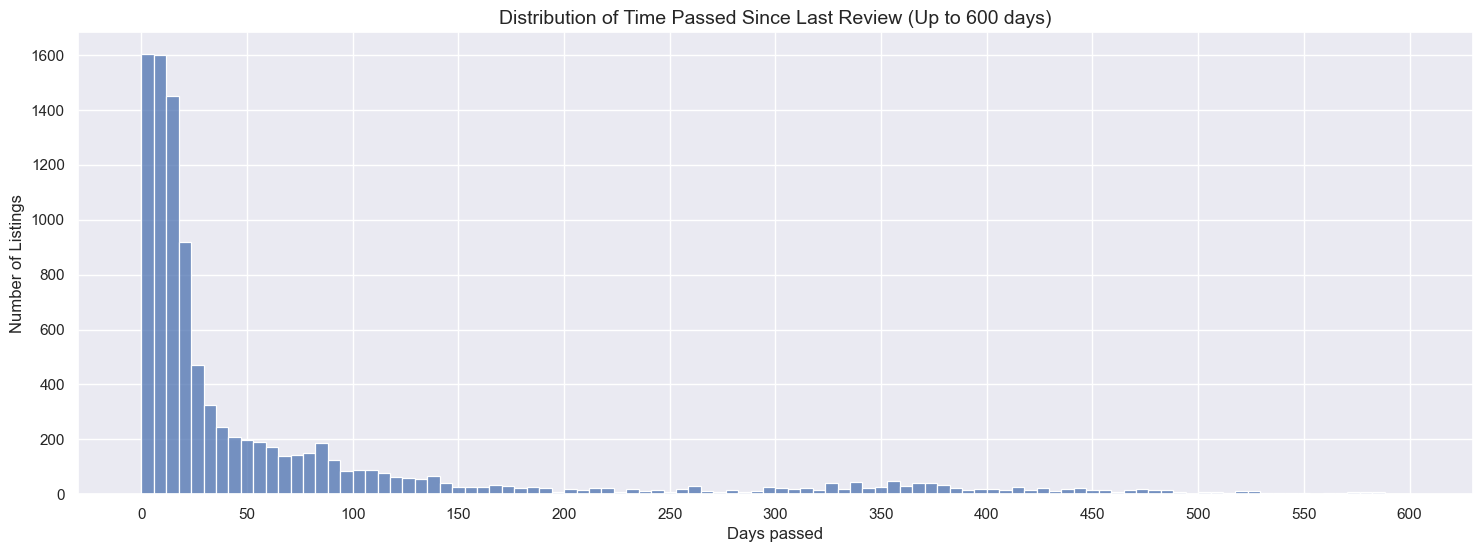

In [124]:
plt.figure(figsize=(18, 6))

ax = sns.histplot(data=last_reviews.query('time_passed <= 600')['time_passed'])

ax.set_xticks(range(0, 601, 50))
ax.set_title('Distribution of Time Passed Since Last Review (Up to 600 days)', fontsize=14)
ax.set_xlabel('Days passed')
ax.set_ylabel('Number of Listings')

plt.savefig('Graphs/distrib_time_passed.png')
plt.show()

### Price Variation Across Room Types

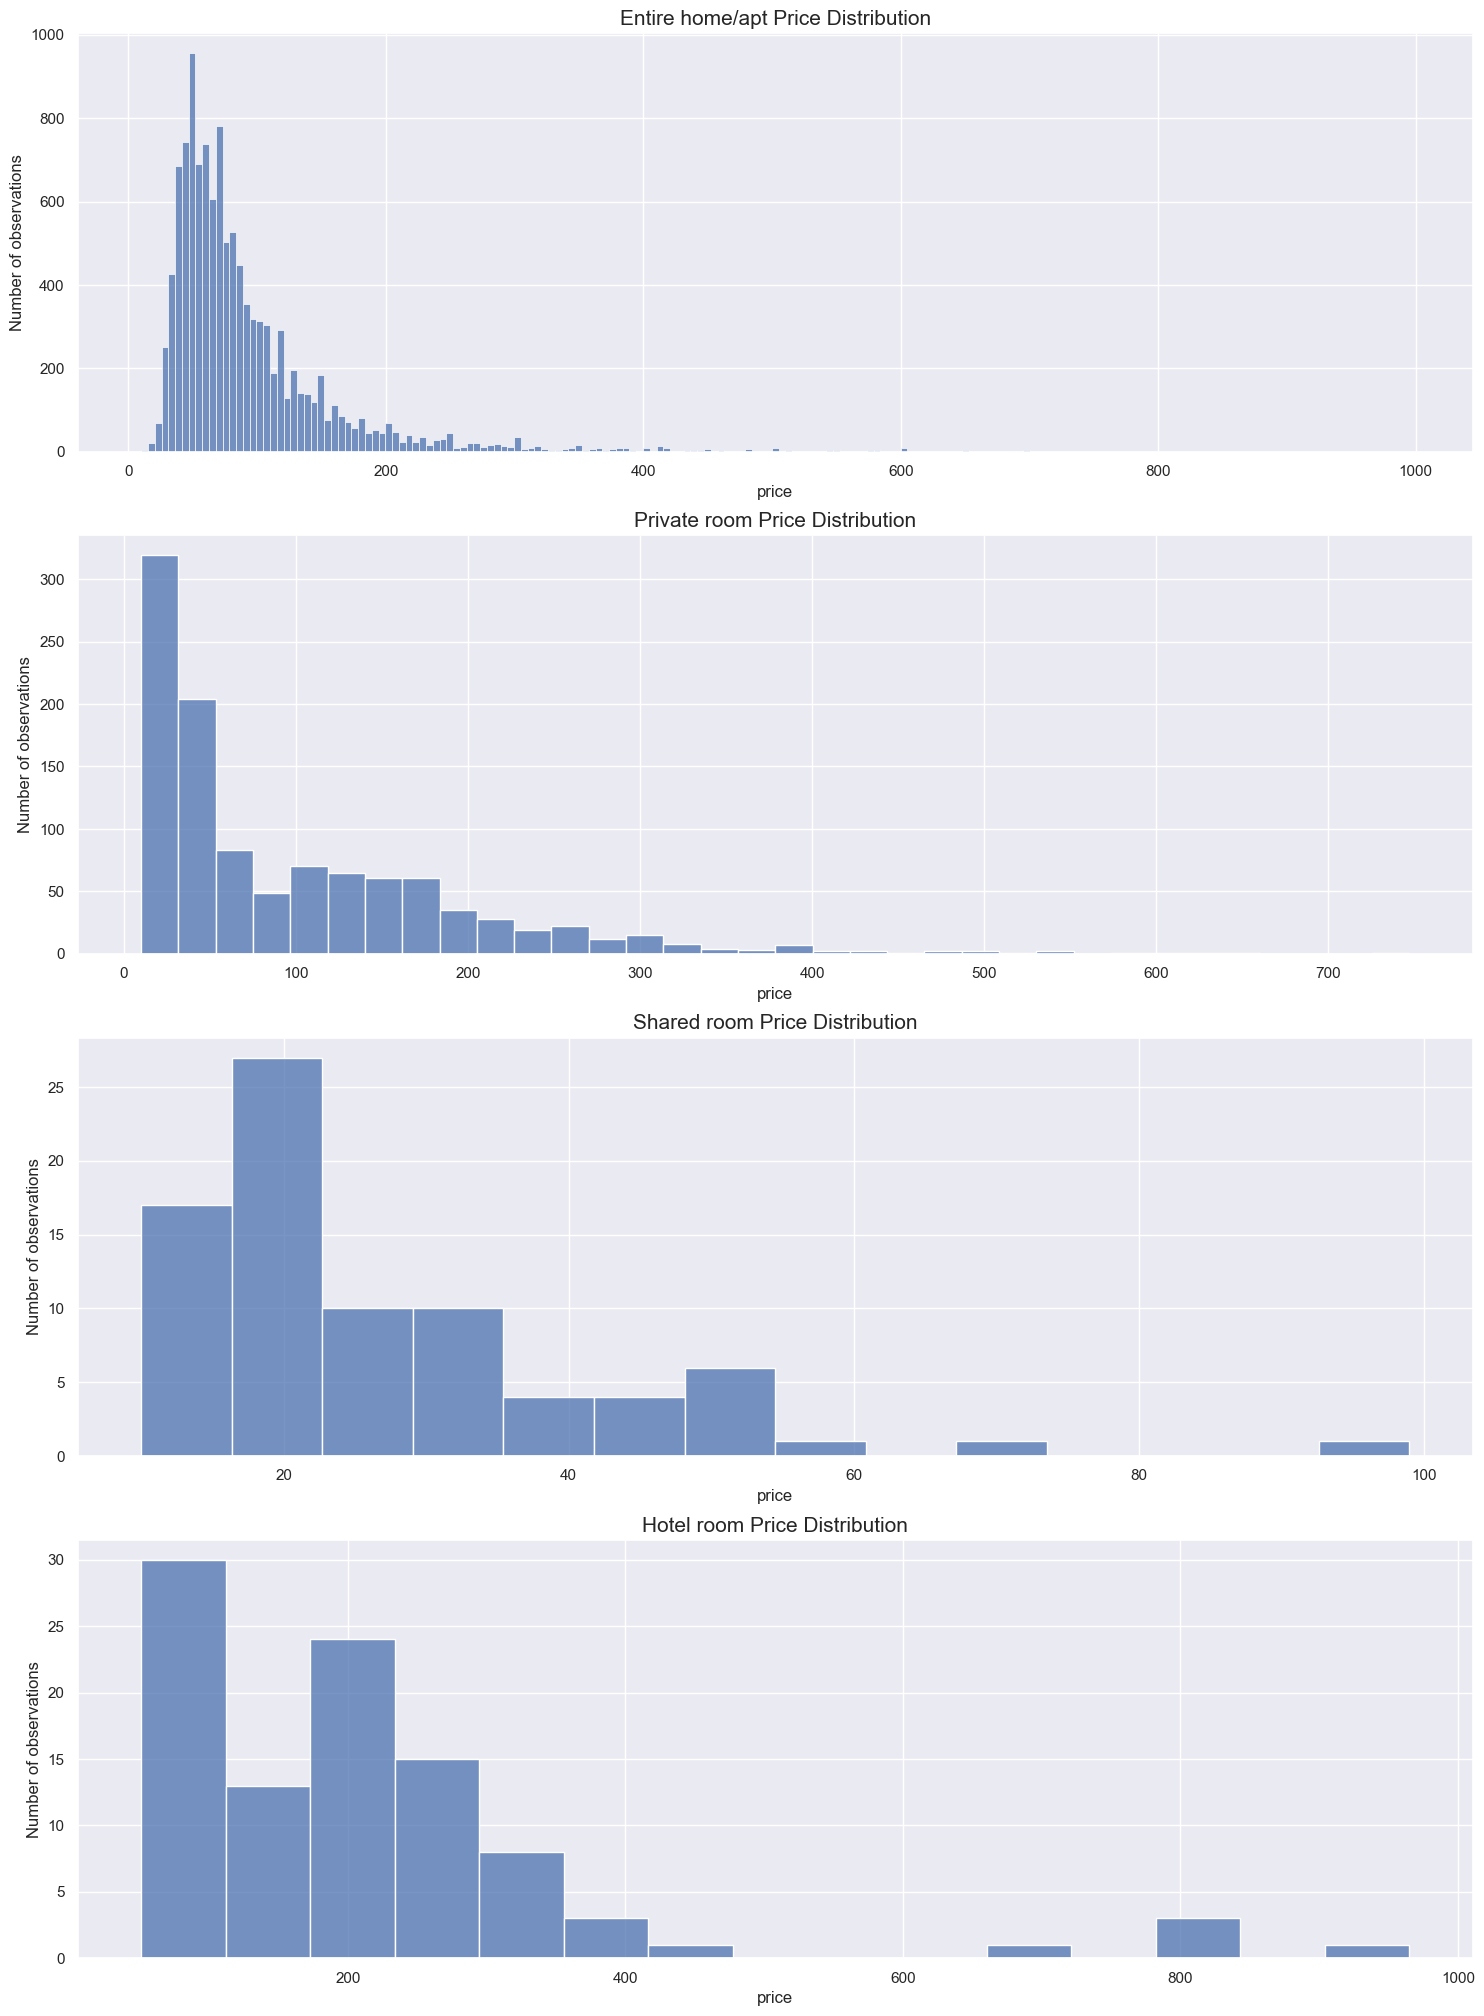

In [125]:
fig, axs = plt.subplots(4, 1, figsize=(18, 25))

count = 0
for room in listings['room_type'].unique():
    room_data = listings.query(f'room_type == "{room}"')
    num_bins = len(stats.freedman_bin_width(room_data['price'], return_bins=True)[1])
    
    _= sns.histplot(data=room_data['price'], bins=num_bins, ax=axs[count])
    axs[count].set_title(f'{room} Price Distribution', fontsize=15)
    axs[count].set_ylabel('Number of observations')
    count += 1

plt.savefig("Graphs/price_variation_across_room_type.png")
plt.show()